## Background
Transjakarta is the first and the largest BRT network in Southeast Asia. Established in 2004, Transjakarta is designed as integrated mass trasnport that accomodates public movement across Greater Jakarta Region. With 14 BRT corridors and 252 stops, Transjakarta has the longest BRT line in the world. With its ever-expanding network and growing passengers, analysis of passenger movement and behavior are needed to improve overall service and create business decisions for a better organization in the future.

## Problem
With its easy-to-use and extensive service, Transjakarta needs to maintain fleet avaliability across corridors. Therefore, understanding passenger movement is essential to ensure that decisions made have a positive impact on operations. To achieve this, we need to address the following questions:

**1. What are the characteristics of Transjakarta passengers, such as gender, age, and travel time?**

**2. Which Transjakarta corridor is the busiest and most profitable? How's the contribution of those corridors toward Transjakarta's traffic and revenue?**

In [266]:
import numpy as np
import pandas as pd

from datetime import datetime,timedelta
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

We will have an overview of the dataset first. We're going to use Transjakarta Passenger's data within April 2023.

* Load the dataset and display its head and tail

In [267]:
path = r'C:\Users\Erlangga\Documents\DTI_Purwadhika\Excercise\Module 2\TransJakarta.csv'
df = pd.read_csv(path)
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


* Display number of rows and columns

In [268]:
print('No. of Cols =', df.shape[1])
print('No. of Rows =', df.shape[0])

No. of Cols = 22
No. of Rows = 37900


* Display number of non-null rows and data types

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

The dataset contains information about transaction that occured based on the payment made by the passengers. It has 22 columns that consist of:
1. transID : Unique transaction identifier made for each transaction that passenger made
2. payCardID : Payment ID, passenger's ticket to enter and exit the bus
3. payCardBank : Payment method used by the passenger related to the payCardID
4. payCardName : Passenger's name related to the payCardID
5. payCardSex : Passenger's sex related to the payCardID
6. payCardBirthDate : Passenger's birth year related to the payCardID
7. corridorID : The corridor that passenger took per one transID
8. corridorName : The corridor name related to the corridorID
9. direction : the direction that passenger's took 0 for Go, 1 for Back related to corridorName 
10. tapInStops : Tap In (entrance) stop ID where the passenger tap their card to enter the bus
11. tapInStopsName :  Tap In stop Name related to the tapInStops
12. tapInStopsLat : The latitude of tapInStops
13. tapInStopsLon : The longitude of tapInStops
14. stopStartSeq : The position of tapInStops where the passenger enter the bus related to the corridorID
15. tapInTime : Date and Time of passenger enter the bus
16. tapOutStops : Tap Out (exit) stop ID where the passenger tap their card to exit the bus
17. tapOutStopsName : Tap Out stop Name related to the tapOutStops
18. tapOutStopsLat : The latitude of tapOutStops
19. tapOutStopsLon : The longitude of tapOutStops
20. stopEndSeq : The position of tapOutStops where the passenger exit the bus related to the corridorID
21. tapOutTime : Date and Time of passenger exit the bus related to the tapOutStops
22. payAmount : The number of passenger's payment for every transID


* Display null values and its percentage

In [270]:
display(df.isnull().sum(), df.isnull().sum()/df.shape[0]*100)

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

* Display duplication

In [271]:
df.duplicated().sum()

np.int64(0)

The dataset has not any duplicated rows.

* Display statistic measurments for every column

In [272]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


Conclusion:
1. Dataset TransJakarta Has 37900 Rows and 22 Columns
2. There is no duplicated data
3. There are seveal columns that has empty value such as: `corridorID`,`corridorName`,`tapInStops`,`tapOutStops`,`tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq`,`tapOutTime`, and `payAmount` 
4. `payAmount` column has 3 values :
    * 3500 Normal
    * 20000 Royal Trans
    * 0 Miktrotrans or Travel Bus or TJ Card holder transaction (Elder, need to check the age)<br>
NaN data need to be cheked if it can be filled based on `corridorID`column<br>
Create a new column `category` based on the `corridorID`
5. `transID` contains unique data that can be opted out for analysis 
6. `payCardBank` column has 6 values : emoney, dki, flazz, online, brizzi, and bni
7. `corridorID` has 221 values, meanwhile `corridorName` has 216 values, which indicates that there might be more than one services in one line corridor. NaN data need to be chekced if it can be filled based on matched value by each other columns
8. `tapInStops` column has several NaN data that need to be chekced if it can be filled based on `tapInStopsName`,`tapInStopsLat`, or `tapInStopsLon`
9. `tapOutStops`,`tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq`,`tapOutTime` NaN data need to be checked if it can be filled based on each other, if four of them are empty, then drop the row (indication of not tapping out)
10. `tapInTime` and `tapOutTime` type data need to be formatted into datetime
11. There will be additional column that will be added after cleaning the existing data

Before we start to clean the data, we need to create a copy of the dataset to make sure the original is preserved for futue usage.

* Create a copy of dataframe

In [273]:
dft = df.copy()

## Data Cleaning

In this part, we'll take a look at some columns that has null values and incorrect data types. We're also going to add some new columns to gain more information from the dataset.

### `corridorID` & `corridorName`

For these columns, we'll look for null values in both of them simultaneously since one `corridorID` must have a pair from `corridorName`

* Check for any null values

In [274]:
dft[dft['corridorID'].isnull() | dft['corridorName'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
38,RLLZ887W3V14WZ,4947438345710982,dki,Rahayu Rahayu,F,2006,5M,NaN,1.0,B02994P,...,106.84025,16,2023-04-03 05:29:43,B05707P,Term. Kampung Melayu 2,-6.224516,106.86685,30.0,2023-04-03 05:58:35,3500.0
39,JJEK861K6E37KF,3539535695881465,dki,"Dr. Zulfa Tamba, S.E.I",M,1986,2,NaN,0.0,P00202,...,106.85809,9,2023-04-03 05:28:22,P00137,Monas,-6.176248,106.82286,19.0,2023-04-03 06:02:36,3500.0
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,NaN,1.0,B00589P,...,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0
61,TWAK265Z0M88QR,213155263532652,emoney,Restu Waluyo,F,1984,12A,NaN,0.0,B05324P,...,106.79423,9,2023-04-03 06:13:03,P00138,Museum Fatahillah,-6.133930,106.81209,18.0,2023-04-03 06:50:23,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37797,HBLN935K0C66OQ,4667337468542,online,"drg. Bala Yolanda, S.Farm",M,1984,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B04607P,...,106.95694,59,2023-04-29 19:18:55,B02223P,Marlindo Marunda,-6.121746,106.95715,61.0,2023-04-29 20:02:28,0.0
37815,OSYS465Q5O68VD,3534140838249087,dki,Saka Pradipta,M,2009,JAK.56,NaN,1.0,B04394P,...,106.77141,45,2023-04-15 18:26:35,B05498P,St. Pesing,-6.161726,106.77127,52.0,2023-04-15 21:01:27,0.0
37824,TMCQ904W0L70TY,4741860768238,online,"drg. Argono Nainggolan, S.Kom",F,1992,S21,NaN,1.0,B01094P,...,106.78857,11,2023-04-07 09:25:03,P00185,Pondok Indah 2,-6.267231,106.78365,13.0,2023-04-07 12:12:33,3500.0
37838,GTLM961T1U29JA,4204405669287580,dki,"Saka Wijaya, S.H.",M,1995,NaN,NaN,1.0,B03520P,...,106.94385,12,2023-04-28 12:30:26,B04078P,Sbr. Masjid Pasmar Marunda,-6.115928,106.95189,64.0,2023-04-28 13:59:57,0.0


There are 2062 rows that has null values on both columns. We will clean them at one time since they're related to each other.To fill the null values on both columns, we will create a dictionary based on the existing data by pairing both columns and fill the null values based on the created dictionary.

* Create a dict for both columns to be mapped into null values

In [275]:
dict_corridorID = dict(zip(dft['corridorID'],dft['corridorName'])) # For corridorName
dict_corridorName = dict(zip(dft['corridorName'],dft['corridorID'])) # For corridorID

* Fill the null values based on the `corridorName` and `corridorID` dict and check if there are any null values left

In [276]:
dft['corridorName'] = dft['corridorName'].fillna(dft['corridorID'].map(dict_corridorID))
dft['corridorID'] = dft['corridorID'].fillna(dft['corridorName'].map(dict_corridorName))
dft[dft['corridorID'].isnull() | dft['corridorName'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,3B,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
120,MCWO805A6Q66MX,3570416613897992,dki,"Gawati Damanik, S.E.",F,2010,3B,NaN,0.0,P00109,...,106.86115,8,2023-04-03 06:38:44,P00224,Slamet Riyadi,-6.208533,106.85929,9.0,2023-04-03 07:32:11,3500.0
240,PTDK452M9A71XF,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,3B,NaN,0.0,B04505P,...,106.81934,13,2023-04-03 05:13:16,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-03 05:39:55,3500.0
250,OLZA217B5B95DK,4371940047525876160,brizzi,Zelda Laksita,M,2009,3B,NaN,1.0,B04576P,...,106.73786,11,2023-04-03 06:24:37,B05009P,Simpang Meruya Ilir 1,-6.196682,106.75517,28.0,2023-04-03 07:13:18,0.0
257,GHEY769K9T55WF,4281653494791,online,Zelda Wibowo,M,1989,3B,NaN,0.0,B00048P,...,106.92867,16,2023-04-03 05:05:24,B05823P,United Tractors 1,-6.183260,106.93243,28.0,2023-04-03 05:41:12,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37770,RGLG273G3M96TE,4725638979751926133,brizzi,"Murti Simanjuntak, M.Farm",M,1988,3B,NaN,1.0,P00076,...,106.83237,11,2023-04-16 09:06:33,P00141,Pakin,-6.127982,106.80474,25.0,2023-04-16 11:14:06,3500.0
37797,HBLN935K0C66OQ,4667337468542,online,"drg. Bala Yolanda, S.Farm",M,1984,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B04607P,...,106.95694,59,2023-04-29 19:18:55,B02223P,Marlindo Marunda,-6.121746,106.95715,61.0,2023-04-29 20:02:28,0.0
37824,TMCQ904W0L70TY,4741860768238,online,"drg. Argono Nainggolan, S.Kom",F,1992,S21,NaN,1.0,B01094P,...,106.78857,11,2023-04-07 09:25:03,P00185,Pondok Indah 2,-6.267231,106.78365,13.0,2023-04-07 12:12:33,3500.0
37838,GTLM961T1U29JA,4204405669287580,dki,"Saka Wijaya, S.H.",M,1995,3B,NaN,1.0,B03520P,...,106.94385,12,2023-04-28 12:30:26,B04078P,Sbr. Masjid Pasmar Marunda,-6.115928,106.95189,64.0,2023-04-28 13:59:57,0.0


There are 1144 rows of the data left that can't be filled with using previous rule. We will fill them by checking on the `corridorID` and `corridorName` based on Transjakarta or moovit website.

* Check the rest of null values that are not filled in both columns

In [277]:
display(
    dft[dft['corridorID'].isnull()]['corridorName'].unique(),
    dft[dft['corridorName'].isnull()]['corridorID'].unique()
)

array(['Rusun Marunda - Terminal Terpadu Pulo Gebang'], dtype=object)

array(['3B', '9D', 'S21'], dtype=object)

* Find Missing `corridorID` and `corridorName`, then check the `category` and `payAmount`

    - Rusun Marunda - Termial Terpadu Pulo Gebang is JAK.110A (category= Special, payAmount = 0)
https://transjakarta.co.id/rute#110a
    - 3B is Rusun Flamboyan - Cengkareng (category=Normal,payAmount = 3500)
https://transjakarta.co.id/rute#3b
    - 9D is Pasar Minggu - Tanah Abang (category=Normal,payAmount = 3500)
https://transjakarta.co.id/rute#9d 
    - S21 is Kejaksaan Agung - Ciputat (category=Normal, payAmount = 3500)
https://transjakarta.co.id/rute#S21

In [278]:
dft['corridorID'] = dft['corridorID'].replace(np.nan,'JAK.110A')

dft['corridorName'] = np.where(
    (pd.isnull(dft['corridorName'])) & (dft['corridorID'] == '3B'), 'Rusun Flamboyan - Cengkareng',
    np.where(
        (pd.isnull(dft['corridorName'])) & (dft['corridorID'] == '9D'), 'Pasar Minggu - Tanah Abang',
        np.where(
            (pd.isnull(dft['corridorName'])) & (dft['corridorID'] == 'S21'), 'Kejaksaan Agung - Ciputat',
            dft['corridorName']
            )
        )
    )

After that, we need to check again for any null values. If there's none, we can continue onto the next part.

In [279]:
display(
    dft['corridorID'].isnull().sum(),
    dft['corridorName'].isnull().sum()
)

np.int64(0)

np.int64(0)

### `tapInStops`

We'll look for null values in `tapInStops` column

* Check for any null values

In [280]:
dft[dft['tapInStops'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.852930,20.0,2023-04-03 05:30:45,0.0
41,VUWZ891M7I57EB,344303671677311,emoney,"R. Mila Wahyuni, S.Sos",F,2006,R1A,Pantai Maju - Kota,1.0,NaN,...,106.79409,12,2023-04-03 06:50:06,B00242P,Centro Metro Broadway,-6.116362,106.761430,29.0,2023-04-03 07:30:53,3500.0
101,XVWU715D9V59FV,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,...,106.80054,0,2023-04-03 06:45:56,B01846P,Kav Polri Blok E Jagakarsa,-6.314309,106.816330,13.0,2023-04-03 07:36:05,0.0
122,ENXD420E9G92TO,4817620823758230,dki,"Dina Halimah, S.Psi",F,1993,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,NaN,...,106.79791,19,2023-04-03 06:21:20,B04952P,Simpang Kota Bambu Utara I,-6.186126,106.808660,24.0,2023-04-03 07:09:28,0.0
163,SRLS290P0Y95NP,180074853270640,emoney,"Dr. Laswi Usamah, S.Ked",F,1959,7Q,Blok M - PGC,1.0,NaN,...,106.81376,26,2023-04-03 06:12:58,B01437P,Jln. Palatehan,-6.240057,106.800758,31.0,2023-04-03 06:42:20,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37775,MYWZ762F5O31MX,344406439989280,emoney,R. Respati Usamah,F,2012,JAK.53,Grogol - Pos Pengumben via Slipi,0.0,NaN,...,106.76935,68,2023-04-09 18:19:04,B01162P,Jln. Inspeksi Kali Pesanggrahan Barat,-6.208392,106.764670,70.0,2023-04-09 19:42:22,0.0
37816,HRMG833E4D75MZ,2264435942253035,dki,Vanya Anggraini,F,2007,JAK.26,Rawamangun - Duren Sawit,1.0,NaN,...,106.88785,12,2023-04-11 08:05:50,B02941P,Pool Hiba Utama 1,-6.206384,106.902690,32.0,2023-04-11 10:24:43,0.0
37822,XWEY170L8K03CW,3538799233101916,dki,Lantar Maheswara,F,1983,JAK.20,Cawang UKI - Lubang Buaya,1.0,NaN,...,106.88040,34,2023-04-24 11:54:53,B04630P,Sekolah Fatimiyah Perdana Kusuma,-6.249936,106.880030,35.0,2023-04-24 14:42:13,0.0
37855,OCHT739D6O31VL,4434749577653,online,drg. Ifa Salahudin,M,1950,JAK.16,Cililitan - Condet,1.0,NaN,...,106.84996,10,2023-04-12 15:04:05,B03442P,Sbr. Akses Jembatan Ciliwung Balekambang,-6.283464,106.849450,12.0,2023-04-12 16:54:34,0.0


There are 1213 rows that has null values on `tapInStops`. To fill them, we can create dictionary to pair `tapInStops`,`tapOutStops` with `tapInStopsName`,`tapOutStopsName` relatively since they're basically just bus stops and then fill the null values based on the created dictionary.

* Create a dict to map the stop ids and stop names and fill the null according to the dict

In [281]:
dict_tapIn = dict(zip(dft['tapInStops'],dft['tapInStopsName'])) # For tapIn
dict_tapOut = dict(zip(dft['tapOutStops'],dft['tapOutStopsName'])) # For tapOut (later will be used)
dict_tap = dict_tapIn | dict_tapOut # combine two dicts
reverse_dict_tap = {val:key for key,val in dict_tap.items()} # reverse for mapping based on Stops Name

In [282]:
dft['tapInStops'] = dft['tapInStops'].fillna(dft['tapInStopsName'].map(reverse_dict_tap)) # Fill NaN by mapping through existing stops id
dft[dft['tapInStops'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32365,GFXI432F3W42KE,342872650777880,emoney,Carla Maryati,F,2006,S11,BSD - Jelambar,0.0,NaN,...,106.648890,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.642560,19.0,2023-04-09 20:17:31,3500.0
32533,SJEG609E5A77VR,3511593949794788,dki,Humaira Maryadi,F,1992,12B,Pluit - Senen,1.0,NaN,...,106.835090,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.779610,41.0,2023-04-09 19:36:31,3500.0
32572,OHMY262Z9S32VK,3531560183774236,dki,Kiandra Nashiruddin,M,1993,JAK.58,Cilincing - Rorotan,1.0,NaN,...,106.954780,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.956690,24.0,2023-04-08 07:10:38,0.0
32663,DKJP886D8B30GD,4225751347437323699,brizzi,Hj. Dewi Firmansyah,M,1978,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,...,106.903190,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.912950,28.0,2023-04-09 22:42:32,0.0
32768,AMRU195J1Q27AC,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973,6T,Pasar Minggu - Velbak,0.0,NaN,...,106.797430,18,2023-04-16 07:07:32,B04808P,Simpang Gandaria Kyai Maja,-6.241860,106.790000,39.0,2023-04-16 07:48:30,3500.0
32852,WQEY067N5P53RZ,371996902605484,emoney,Yuliana Hakim,M,2001,JAK.05,Semper - Rorotan,1.0,NaN,...,106.964910,33,2023-04-16 20:38:07,B02439P,MI Arruhaniyah Rorotan,-6.135438,106.967440,34.0,2023-04-16 22:18:38,0.0
33093,PSIS658K4H51NE,3549492311838172,dki,T. Harimurti Mangunsong,M,1952,JAK.99,Term. Pulo Gadung - Lampiri,0.0,NaN,...,106.922874,16,2023-04-16 09:11:52,B00284P,Curug Kalimalang,-6.247740,106.924540,29.0,2023-04-16 10:57:46,0.0
33364,DMGY817Y4T47VA,3595557073549879,dki,"Hasan Hassanah, S.E.I",F,2001,JAK.50,Kalideres - Puri Kembangan,1.0,NaN,...,106.711980,33,2023-04-16 18:04:28,B00288P,Daarus Saada Duri Kosambi,-6.176932,106.707900,35.0,2023-04-16 19:40:16,0.0
33417,OMPE873G2S59RS,3578456570165787,dki,Septi Najmudin,F,2002,JAK.17,Senen - Pulo Gadung,1.0,NaN,...,106.883850,38,2023-04-23 09:07:36,B02999P,Pulo Gadung 4,-6.184383,106.907980,52.0,2023-04-23 10:51:48,0.0
33424,ONZF587U9M08JU,3536572066357562,dki,Vivi Salahudin,F,1990,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,NaN,...,106.917420,1,2023-04-22 15:16:20,NaN,Masjid Al Waqof,-6.110646,106.917330,2.0,2023-04-22 15:54:34,0.0


That there are 22 rows of the data left that haven't been filled with using previous rule. Since the stop ids cannot be found online, We will fill those null values by checking whether the `tapInStopsName` is actually exist or not in our previously made dictionary. If they're not exist, we will create an iterative id for them.

* Check if the remaining `tapInStopsName` is exist in the dict

In [283]:
rest_stopID = dft[dft['tapInStops'].isnull()]['tapInStopsName']

for i in rest_stopID:
    if i in reverse_dict_tap.keys():
        print(reverse_dict_tap)
    elif i in dict_tapIn.values():
        print(dict_tapIn)
    elif i in dict_tapOut.values():
        print(dict_tapOut)
    else:
        print(f'{i} ID(s) do not exist!')

Bundaran Alam Sutera 1 ID(s) do not exist!
Graha Sindu Bpk Penabur ID(s) do not exist!
Rusun Rorotan 2 ID(s) do not exist!
Jln. Pinang 1 ID(s) do not exist!
Fatmawati 1 ID(s) do not exist!
Ponpes Baitul Quran Al Ikhwan 1 ID(s) do not exist!
Sbr. Jln. Rawabadung ID(s) do not exist!
Green Lake City ID(s) do not exist!
Sbr. STIE Rawamangun ID(s) do not exist!
Simpang Jln. Kramat Jaya 2 ID(s) do not exist!
Cipinang ID(s) do not exist!
Sbr. SMAN 41 ID(s) do not exist!
Sisma Medikal ID(s) do not exist!
Klinik Sasana Husada ID(s) do not exist!
Gg. Al Mawaddah Tengah ID(s) do not exist!
Kec. Pondok Gede ID(s) do not exist!
Sbr. Ruko Taman Cemara ID(s) do not exist!
Sbr. Barito Park ID(s) do not exist!
Sbr. Gg. Langgar Kelapa Dua ID(s) do not exist!
Cipinang Lontar Rusun Polri ID(s) do not exist!
Menara Cardig ID(s) do not exist!
Kel. Balekambang ID(s) do not exist!


* Create ID for stop with nonexistent ID and fill the null values

In [284]:
rest_nan_stopID = dft[dft['tapInStops'].isnull()].index

for i, idx in enumerate(rest_nan_stopID):
    value = f'InID{i}'  
    dft.at[idx, 'tapInStops'] = value

After that, we need to check again for any null values. If there's none, we can continue onto the next part.

In [285]:
dft['tapInStops'].isnull().sum()

np.int64(0)

### `tapOutStops` & `tapOutStopsName`

For these columns, we'll look for null values in both of them simultaneously since one `tapOutStops` must have a pair from `tapOutStopsName`

* Check for any null values

In [286]:
dft[dft['tapOutStops'].isnull() | dft['tapOutStopsName'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,106.82190,7,2023-04-03 05:57:55,NaN,NaN,NaN,NaN,NaN,NaN,20000.0
89,QMHC825R0K38KM,3537543297101185,dki,Samsul Ramadan,M,1966,M11,Pulo Gebang - Pulo Gadung 2,1.0,P00158,...,106.90591,0,2023-04-03 06:23:36,NaN,Walikota Jakarta Timur,-6.212540,106.94537,7.0,2023-04-03 06:52:14,3500.0
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,...,106.87920,7,2023-04-03 05:40:04,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37796,UJTW104Z9P85GX,6507084113625619,dki,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,...,106.81088,7,2023-04-02 05:55:01,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
37799,GRKE798M1S93HC,4897976988760145,dki,Drs. Labuh Permata,F,2006,JAK.41,Kampung Melayu - Pulo Gadung,0.0,B02707P,...,106.87421,8,2023-04-12 15:34:06,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


There are 2289 rows that has null values on both columns. We will clean them at one time since they're related to each other.To fill the null values on both columns, we will create a dictionary based on the existing data by pairing both columns and fill the null values based on the created dictionary.

* Fill null values using stops dict and check for any null values left

In [287]:
dft['tapOutStopsName'] = dft['tapOutStopsName'].fillna(dft['tapOutStops'].map(dict_tap)) # Fill NaN by mapping through existing stops name
dft['tapOutStops'] = dft['tapOutStops'].fillna(dft['tapOutStopsName'].map(reverse_dict_tap)) # Fill NaN by mapping through existing stops id
dft[dft['tapOutStops'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32068,BXRQ766N7W94KH,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05022P,...,106.86776,2,2023-04-08 16:32:00,NaN,Jln. H. Yahya,-6.230219,106.87122,5.0,2023-04-08 17:20:01,0.0
32960,SLEX356F6M31TA,4713105079051022,dki,Gangsar Palastri,F,1984,JAK.64,Lenteng Agung - Aseli,1.0,B04556P,...,106.82746,2,2023-04-16 09:06:57,NaN,MIN 8 Srengseng Sawah,-6.335943,106.82628,17.0,2023-04-16 10:59:28,0.0
33961,POUD123Y3H41XB,4300964686794,online,Ir. Prakosa Maryadi,F,1994,JAK.21,Cililitan - Dwikora,0.0,B01724P,...,106.87224,5,2023-04-23 06:17:27,NaN,Grha Intirub,-6.265216,106.87599,7.0,2023-04-23 08:08:49,0.0
34084,EQOM074W9Q50QT,3523501988176433,dki,Eli Mangunsong,F,2001,JAK.64,Lenteng Agung - Aseli,1.0,B00785P,...,106.83300,13,2023-04-23 21:26:34,NaN,Jln. Timbul III,-6.350411,106.80329,32.0,2023-04-23 22:53:38,0.0
34130,NJCG199T7J76PN,30007077737525,bni,Ida Rahayu,F,1999,JAK.37,Cililitan - Condet via Kayu Manis,1.0,B03532P,...,106.86300,21,2023-04-30 08:39:19,NaN,Griya Galaxy 126,-6.283553,106.86431,25.0,2023-04-30 09:32:48,0.0
34179,FVXM564O3T01MZ,4164228439880077074,brizzi,"Raisa Dabukke, M.Pd",M,1979,JAK.53,Grogol - Pos Pengumben via Slipi,0.0,B03973P,...,106.78965,24,2023-04-30 13:27:37,NaN,Permata Eksekutif 2,-6.216798,106.76524,66.0,2023-04-30 14:36:14,0.0
34213,LJAQ786H0F99XD,340627622454204,emoney,Nurul Palastri,F,1992,JAK.71,Kampung Rambutan - Pinang Ranti,1.0,B02911P,...,106.88450,1,2023-04-30 14:23:17,NaN,Jln. Siman Noar,-6.300103,106.88072,10.0,2023-04-30 15:41:06,0.0
34547,HIKV769M2D14PB,4194044871819252,dki,"Sutan Mumpuni Saragih, M.M.",F,2001,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,1.0,B00764P,...,106.91053,8,2023-04-29 10:19:09,NaN,Sbr. Jln. Gading Griya Lestari,-6.141220,106.91433,19.0,2023-04-29 10:35:59,0.0
37657,BINX034P0X88YN,371852916882447,emoney,Puspa Aryani,F,1967,JAK.33,Pulo Gadung - Kota,1.0,B04951P,...,106.80986,1,2023-04-11 20:28:26,NaN,Jln. Cempaka Putih Tengah XXVII,-6.176274,106.87167,59.0,2023-04-11 22:52:12,0.0


There are 9 rows of the data that haven't been filled with using previous rule. Since the stop ids cannot be found online, We will fill them by checking whether the `tapOutStopsName` is actually exist or not in our previously made dictionary. If not, we will create an iterative id for them.

* Check if the stop name is exist in the dict

In [288]:
rest_stopID_new = dft[dft['tapOutStops'].isnull()]['tapOutStopsName']

for i in rest_stopID_new:
    if i in reverse_dict_tap.keys():
        print(reverse_dict_tap)
    elif i in dict_tapIn.values():
        print(dict_tapIn)
    elif i in dict_tapOut.values():
        print(dict_tapOut)
    else:
        print(f'{i} ID(s) do not exist!')

Jln. H. Yahya ID(s) do not exist!
MIN 8 Srengseng Sawah ID(s) do not exist!
Grha Intirub ID(s) do not exist!
Jln. Timbul III ID(s) do not exist!
Griya Galaxy 126 ID(s) do not exist!
Permata Eksekutif 2 ID(s) do not exist!
Jln. Siman Noar ID(s) do not exist!
Sbr. Jln. Gading Griya Lestari ID(s) do not exist!
Jln. Cempaka Putih Tengah XXVII ID(s) do not exist!


* Create ID for stop with nonexistent ID and fill the null values

In [289]:
rest_nan_stopID_new = dft[dft['tapOutStops'].isnull()].index

for i, idx in enumerate(rest_nan_stopID_new):
    value = f'OutID{i}'  
    dft.at[idx, 'tapOutStops'] = value  

After that, we need to check again for any null values. If there's none, we can continue onto the next part.

In [290]:
display(
    dft['tapOutStops'].isnull().sum(),
    dft['tapOutStopsName'].isnull().sum()
)

np.int64(0)

np.int64(0)

### `tapOutStopsLat` & `tapOutStopsLon`

For these columns, we'll look for null values in both of them simultaneously since one `tapOutStopsLat` must have a pair from `tapOutStopsLon`

In [291]:
dft[dft['tapOutStopsLat'].isnull() | dft['tapOutStopsLon'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,0.0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,106.82190,7,2023-04-03 05:57:55,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,20000.0
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,...,106.87920,7,2023-04-03 05:40:04,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,3500.0
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,...,106.73810,11,2023-04-03 06:15:53,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37738,HVBG065E5W16QD,5340783842827882,dki,Rendy Pratama,F,1989,5F,Kampung Melayu - Tanah Abang,1.0,B02318P,...,106.81516,0,2023-04-30 07:34:10,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,3500.0
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,...,106.85280,20,2023-04-21 12:08:43,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,0.0
37777,JBJR710B1I01HV,4380502298652105326,brizzi,Ella Zulkarnain,M,1990,JAK.30,Grogol - Meruya via Roxy,1.0,B01914P,...,106.77307,43,2023-04-03 21:59:15,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,0.0
37796,UJTW104Z9P85GX,6507084113625619,dki,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,...,106.81088,7,2023-04-02 05:55:01,B00573P,Gg. Trijaya IV Tebet Timur,NaN,NaN,NaN,NaN,3500.0


There are 2289 rows and 1344 rows that has null values on both columns. To fill them, we will create dictionary to pair both column and then fill the null values based on the created dictionary.

* Create a dict for the coordinates

In [292]:
dict_tapOutStopsLat = dict(zip(dft['tapOutStops'],dft['tapOutStopsLat']))
dict_tapOutStopsLon = dict(zip(dft['tapOutStops'],dft['tapOutStopsLon']))

* Fill the null values based on coordinates dict

In [293]:
dft['tapOutStopsLat'] = dft['tapOutStopsLat'].fillna(dft['tapOutStops'].map(dict_tapOutStopsLat))
dft['tapOutStopsLon'] = dft['tapOutStopsLon'].fillna(dft['tapOutStops'].map(dict_tapOutStopsLon))

After that, we need to check again for any null values. If there's none, we can continue onto the next part.

In [294]:
display(
    dft['tapInStopsLat'].isnull().sum(),
    dft['tapInStopsLon'].isnull().sum()
)

np.int64(0)

np.int64(0)

### `stopEndSeq`

We'll look for null values in `stopEndSeq` column

* Check for any null values

In [295]:
dft[dft['stopEndSeq'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,106.82190,7,2023-04-03 05:57:55,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,20000.0
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,...,106.87920,7,2023-04-03 05:40:04,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,3500.0
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,...,106.73810,11,2023-04-03 06:15:53,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37738,HVBG065E5W16QD,5340783842827882,dki,Rendy Pratama,F,1989,5F,Kampung Melayu - Tanah Abang,1.0,B02318P,...,106.81516,0,2023-04-30 07:34:10,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,3500.0
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,...,106.85280,20,2023-04-21 12:08:43,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
37777,JBJR710B1I01HV,4380502298652105326,brizzi,Ella Zulkarnain,M,1990,JAK.30,Grogol - Meruya via Roxy,1.0,B01914P,...,106.77307,43,2023-04-03 21:59:15,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
37796,UJTW104Z9P85GX,6507084113625619,dki,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,...,106.81088,7,2023-04-02 05:55:01,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,3500.0


There are 1344 rows that has null values on `stopEndSeq` column. We need to check `tapOutStopsName` to see if every null values has the same endpoint location

* Check `tapOutStopsName` unique value for every `stopEndSeq` that has null value

In [296]:
dft[dft['stopEndSeq'].isnull()]['tapOutStopsName'].unique()

array(['Gg. Trijaya IV Tebet Timur'], dtype=object)

We know that there's only one stop that has null value on its `stopEndSeq`, 'Gg. Trijaya IV Tebet Timur', with `corridorID` of 'JAK.18'. Based on https://maps.app.goo.gl/278iZXvkpdrff8Xb7 , JAK18 is the only one to serve the route to Gg. Trijaya IV Tebet Timur. We need to check if the null values is exist in both `direction` (0 : Go, 1 :Back) to determine 'Gg. Trijaya IV Tebet Timur' position.

* Check `stopEndSeq` with null values and `corridorID` of JAK.18 in `direction` 0 and `direction` 1

In [297]:
display(
    dft[dft['stopEndSeq'].isnull() & (dft['corridorID'] == 'JAK.18') &(dft['direction'] == 0)]
    [['tapInStops','tapInStopsName','stopStartSeq','tapOutStops','tapOutStopsName','stopEndSeq']],
    dft[dft['stopEndSeq'].isnull() & (dft['corridorID'] == 'JAK.18') &(dft['direction'] == 1)]
    [['tapInStops','tapInStopsName','stopStartSeq','tapOutStops','tapOutStopsName','stopEndSeq']]
)

,tapInStops,tapInStopsName,stopStartSeq,tapOutStops,tapOutStopsName,stopEndSeq
6,B00243P,Cervino Village,25,B00573P,Gg. Trijaya IV Tebet Timur,NaN
24396,B04158P,Sbr. Ps. Lokbin Muria,48,B00573P,Gg. Trijaya IV Tebet Timur,NaN
26885,B01316P,Jln. Lapangan Ros II Bukit Duri,31,B00573P,Gg. Trijaya IV Tebet Timur,NaN
36120,B02727P,Pengadegan Barat VI,3,B00573P,Gg. Trijaya IV Tebet Timur,NaN
37762,B00573P,Gg. Trijaya IV Tebet Timur,20,B00573P,Gg. Trijaya IV Tebet Timur,NaN


,tapInStops,tapInStopsName,stopStartSeq,tapOutStops,tapOutStopsName,stopEndSeq
5915,B03334P,SDN 01 02 03,7,B00573P,Gg. Trijaya IV Tebet Timur,NaN
17917,B02730P,Pengadegan Selatan III,49,B00573P,Gg. Trijaya IV Tebet Timur,NaN
21385,B02230P,Masjid Al Barakah Assyafiiyah,15,B00573P,Gg. Trijaya IV Tebet Timur,NaN
33904,B02044P,Komplek Kejari Tebet Dalam,37,B00573P,Gg. Trijaya IV Tebet Timur,NaN
34410,B03126P,RS Budi Jaya,8,B00573P,Gg. Trijaya IV Tebet Timur,NaN


We see that 'Gg. Trijaya IV Tebet Timur' is at sequence 20 of direction 0, and is at sequence 30 at direction 1 based on https://transjakarta.co.id/rute#jak18. With this infomration, we will fill `stopEndSeq` null values with these rules:

* Drop every row except for `corridorID` = JAK.18, because Gg. Trijaya IV Tebet Timur only have one corridor, JAK.18

* Set Gg. Trijaya IV Tebet Timur as the end point, hence, drop all starting sequence row that has bigger value than Gg. Trijaya IV Tebet Timur sequence relative to the direction:

    * Set B00573P direction 0 ('Gg. Trijaya IV Tebet Timur' `tapOutStops`) `stopEndSeq` = 20, if `stopStartSeq` > 20, drop row

    * Set B00573P direction 1 ('Gg. Trijaya IV Tebet Timur' `tapOutStops`) `stopEndSeq` = 30, if `stopStartSeq` > 30, drop row  

In [298]:
drop_except_jak18 = dft[(dft['stopEndSeq'].isnull() & (dft['corridorID'] != 'JAK.18'))].index
dft = dft.drop(drop_except_jak18)
dft[dft['stopEndSeq'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.851650,25,2023-04-03 06:58:21,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
5915,NYEZ768Y0D19RK,6571636366239447,dki,Hamzah Zulaika,M,1986,JAK.18,Kalibata - Kuningan,1.0,B03334P,...,106.845492,7,2023-04-14 16:03:10,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
17917,NAFU946G8H22YJ,572846044996,flazz,Soleh Natsir,F,2000,JAK.18,Kalibata - Kuningan,1.0,B02730P,...,106.855803,49,2023-04-10 17:29:49,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
21385,BSSP492O7T66BM,4561932486313369523,brizzi,Talia Utama,M,1973,JAK.18,Kalibata - Kuningan,1.0,B02230P,...,106.850800,15,2023-04-14 08:00:14,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
24396,IONN678A0I87SN,213184927022546,emoney,Galih Saputra,F,2006,JAK.18,Kalibata - Kuningan,0.0,B04158P,...,106.838440,48,2023-04-19 09:17:37,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
26885,JXEA001L5N98UY,4561932486313369523,brizzi,Talia Utama,M,1973,JAK.18,Kalibata - Kuningan,0.0,B01316P,...,106.855120,31,2023-04-21 17:08:22,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
33904,FDWF159F6B24PC,3595563351921350,dki,"dr. Unjani Haryanto, S.I.Kom",F,1982,JAK.18,Kalibata - Kuningan,1.0,B02044P,...,106.845420,37,2023-04-23 09:35:55,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
34410,GKMO715Z7T87DK,6520849770634960,dki,"Drs. Hilda Anggraini, S.Farm",M,1982,JAK.18,Kalibata - Kuningan,1.0,B03126P,...,106.845190,8,2023-04-29 21:40:18,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
36120,JKRQ451T4C95GY,6011024970416149,dki,"Nadia Saragih, S.I.Kom",F,2002,JAK.18,Kalibata - Kuningan,0.0,B02727P,...,106.853970,3,2023-04-16 07:49:19,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,...,106.852800,20,2023-04-21 12:08:43,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0


In [299]:
drop_dir0_more20 = dft[(dft['stopEndSeq'].isnull() & (dft['direction'] == 0) & (dft['stopStartSeq'] >20 ))].index
dft = dft.drop(drop_dir0_more20)
dft[dft['stopEndSeq'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
5915,NYEZ768Y0D19RK,6571636366239447,dki,Hamzah Zulaika,M,1986,JAK.18,Kalibata - Kuningan,1.0,B03334P,...,106.845492,7,2023-04-14 16:03:10,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
17917,NAFU946G8H22YJ,572846044996,flazz,Soleh Natsir,F,2000,JAK.18,Kalibata - Kuningan,1.0,B02730P,...,106.855803,49,2023-04-10 17:29:49,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
21385,BSSP492O7T66BM,4561932486313369523,brizzi,Talia Utama,M,1973,JAK.18,Kalibata - Kuningan,1.0,B02230P,...,106.850800,15,2023-04-14 08:00:14,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
33904,FDWF159F6B24PC,3595563351921350,dki,"dr. Unjani Haryanto, S.I.Kom",F,1982,JAK.18,Kalibata - Kuningan,1.0,B02044P,...,106.845420,37,2023-04-23 09:35:55,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
34410,GKMO715Z7T87DK,6520849770634960,dki,"Drs. Hilda Anggraini, S.Farm",M,1982,JAK.18,Kalibata - Kuningan,1.0,B03126P,...,106.845190,8,2023-04-29 21:40:18,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
36120,JKRQ451T4C95GY,6011024970416149,dki,"Nadia Saragih, S.I.Kom",F,2002,JAK.18,Kalibata - Kuningan,0.0,B02727P,...,106.853970,3,2023-04-16 07:49:19,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,...,106.852800,20,2023-04-21 12:08:43,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0


In [300]:
drop_dir1_more30 = dft[(dft['stopEndSeq'].isnull() & (dft['direction'] == 1) & (dft['stopStartSeq'] >30 ))].index
dft = dft.drop(drop_dir1_more30)
dft[dft['stopEndSeq'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
5915,NYEZ768Y0D19RK,6571636366239447,dki,Hamzah Zulaika,M,1986,JAK.18,Kalibata - Kuningan,1.0,B03334P,...,106.845492,7,2023-04-14 16:03:10,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
21385,BSSP492O7T66BM,4561932486313369523,brizzi,Talia Utama,M,1973,JAK.18,Kalibata - Kuningan,1.0,B02230P,...,106.850800,15,2023-04-14 08:00:14,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
34410,GKMO715Z7T87DK,6520849770634960,dki,"Drs. Hilda Anggraini, S.Farm",M,1982,JAK.18,Kalibata - Kuningan,1.0,B03126P,...,106.845190,8,2023-04-29 21:40:18,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
36120,JKRQ451T4C95GY,6011024970416149,dki,"Nadia Saragih, S.I.Kom",F,2002,JAK.18,Kalibata - Kuningan,0.0,B02727P,...,106.853970,3,2023-04-16 07:49:19,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,...,106.852800,20,2023-04-21 12:08:43,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,NaN,NaN,0.0


After we drop all unnecessary rows, we can fill the null values based on the preivous rule

* Fill null values on `stopEndSec` 

In [301]:
conditions = [
    (dft['stopEndSeq'].isnull() & (dft['direction'] == 0)),
    (dft['stopEndSeq'].isnull() & (dft['direction'] == 1))
]

choices = [20, 30]

dft['stopEndSeq'] = np.select(conditions, choices, default=dft['stopEndSeq'])

After that, we need to check again for any null values. If there's none, we can continue onto the next part.

In [302]:
dft['stopEndSeq'].isnull().sum()

np.int64(0)

### `tapInTime` & `tapOutTime` data types

For these columns, we'll look for data types in both of them simultaneously since they supposed to have same data types

* Check `tapIntime` and `tapOutTime` data types

In [303]:
dft[['tapInTime','tapOutTime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36561 entries, 0 to 37899
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tapInTime   36561 non-null  object
 1   tapOutTime  36556 non-null  object
dtypes: object(2)
memory usage: 856.9+ KB


We will change the data types from *object* into *datetime* since both column contain timestamps of passenger entering and exiting the bus.

* Change the data types into datetime

In [304]:
dft['tapInTime'] = pd.to_datetime(dft['tapInTime'])
dft['tapOutTime'] = pd.to_datetime(dft['tapOutTime'])

After that, we need to check the data types again. If already correct, we can continue onto the next part.

In [305]:
dft[['tapInTime','tapOutTime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36561 entries, 0 to 37899
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tapInTime   36561 non-null  datetime64[ns]
 1   tapOutTime  36556 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 856.9 KB


### `tapOutTime`

We'll look for null values in `tapOutTime` column

* Check for any null values

In [306]:
dft[dft['tapOutTime'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
5915,NYEZ768Y0D19RK,6571636366239447,dki,Hamzah Zulaika,M,1986,JAK.18,Kalibata - Kuningan,1.0,B03334P,...,106.845492,7,2023-04-14 16:03:10,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,30.0,NaT,0.0
21385,BSSP492O7T66BM,4561932486313369523,brizzi,Talia Utama,M,1973,JAK.18,Kalibata - Kuningan,1.0,B02230P,...,106.850800,15,2023-04-14 08:00:14,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,30.0,NaT,0.0
34410,GKMO715Z7T87DK,6520849770634960,dki,"Drs. Hilda Anggraini, S.Farm",M,1982,JAK.18,Kalibata - Kuningan,1.0,B03126P,...,106.845190,8,2023-04-29 21:40:18,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,30.0,NaT,0.0
36120,JKRQ451T4C95GY,6011024970416149,dki,"Nadia Saragih, S.I.Kom",F,2002,JAK.18,Kalibata - Kuningan,0.0,B02727P,...,106.853970,3,2023-04-16 07:49:19,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,20.0,NaT,0.0
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,...,106.852800,20,2023-04-21 12:08:43,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.8528,20.0,NaT,0.0


There are 5 rows that has null values on `tapOutTime` column. To fill it, we need to know the `tapOutTime` and `stopStartSeq` for every null values.

* Check `tapInStops` and `stopStartSeq`

In [307]:
dft[dft['tapOutTime'].isnull()][['tapInStops','tapInStopsName','stopStartSeq','tapInTime','direction','tapOutStops','tapOutStopsName','stopEndSeq','tapOutTime']]

,tapInStops,tapInStopsName,stopStartSeq,tapInTime,direction,tapOutStops,tapOutStopsName,stopEndSeq,tapOutTime
5915,B03334P,SDN 01 02 03,7,2023-04-14 16:03:10,1.0,B00573P,Gg. Trijaya IV Tebet Timur,30.0,NaT
21385,B02230P,Masjid Al Barakah Assyafiiyah,15,2023-04-14 08:00:14,1.0,B00573P,Gg. Trijaya IV Tebet Timur,30.0,NaT
34410,B03126P,RS Budi Jaya,8,2023-04-29 21:40:18,1.0,B00573P,Gg. Trijaya IV Tebet Timur,30.0,NaT
36120,B02727P,Pengadegan Barat VI,3,2023-04-16 07:49:19,0.0,B00573P,Gg. Trijaya IV Tebet Timur,20.0,NaT
37762,B00573P,Gg. Trijaya IV Tebet Timur,20,2023-04-21 12:08:43,0.0,B00573P,Gg. Trijaya IV Tebet Timur,20.0,NaT


We see that the null values has the same end point, 'Gg. Trijaya IV Tebet Timur', which is in JAK.18 corridor. To determine the `tapOutTime`, we need to know how much time spent from the `tapInStops` to the `tapOutStops` based on the usual headway. 

Based on the https://moovitapp.com/index/id/Tranportasi_Umum-line-jak18-Jakarta-2044-2026517-35928100-0#google_vignette, JAK.18 has 10 minute headway. With that information, we can create a mathematical formula to determine time spent like below :

- `tapOutTime` = `tapInTime` + (10 * ( `stopEndSeq` -`stopStartSeq` )) 



* Fill the null values with mentioned formula

In [308]:
time_out =[]
for i in range(len(dft[dft['tapOutTime'].isnull()].index)):
    time_o = dft[dft['tapOutTime'].isnull()].iloc[i,-8] + (timedelta(minutes=10) * (dft[dft['tapOutTime'].isnull()].iloc[i,-3] - dft[dft['tapOutTime'].isnull()].iloc[i,-9]))
    time_out.append(time_o)
dft['tapOutTime'] = dft['tapOutTime'].fillna(pd.Series(time_out, index=dft[dft['tapOutTime'].isnull()].index))

After that, we need to check again for any null values. If there's none, we can continue onto the next part.

In [309]:
dft['tapOutTime'].isnull().sum()

np.int64(0)

### `payAmount`

We'll look for null values in `payAmount` column

* Check for any null values

In [310]:
dft[dft['payAmount'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
76,VHUC320U1S58CB,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B02272P,...,106.85910,1,2023-04-03 06:12:01,B01732P,Jatinegara Timur,-6.220486,106.86825,11.0,2023-04-03 06:57:35,NaN
97,KFYK655N1H73XS,6590854673757012,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,0.0,P00087,...,106.78651,0,2023-04-03 06:03:19,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-03 06:35:04,NaN
169,IWEH403G6J82OS,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,...,106.81421,6,2023-04-03 05:20:08,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:02,NaN
198,WFVC738E7S60SH,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,...,106.85160,21,2023-04-03 05:24:09,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-03 05:54:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37661,PPYR040S6J76TM,4706129919148789,dki,Dt. Galuh Suryono,F,1987,M7B,BKN - Blok M,0.0,B03195P,...,106.84130,10,2023-04-16 13:52:59,B02877P,PLN Duren Tiga 1,-6.254389,106.83416,13.0,2023-04-16 16:38:08,NaN
37674,JXJU834Q7X41YL,4558670606659888636,brizzi,Tantri Siregar,M,1996,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B03305P,...,106.81794,10,2023-04-21 14:08:16,B03318P,Sawo Kecik Raya,-6.224852,106.85489,22.0,2023-04-21 16:56:14,NaN
37741,DEMB799H8M93RH,572311836488,flazz,Cornelia Haryanti,F,1989,3H,Jelambar - Kota,0.0,P00072,...,106.81545,7,2023-04-07 13:19:18,P00013,Kota,-6.136790,106.81490,10.0,2023-04-07 14:05:43,NaN
37861,EDZA126J0W55DK,3520040370814007,dki,Farah Latupono,M,2010,M1H,Tanah Abang - St. Gondangdia,0.0,B01232P,...,106.81827,8,2023-04-30 15:52:34,B02972P,Pospol Jati Bunder,-6.189707,106.81317,15.0,2023-04-30 18:38:25,NaN


There are 968 rows that has null values on `payAmount` column. We need to check `corridorID` and `corridorName` to see if every null values has the same corridor.

* Check `tapInStops` and `stopStartSeq`

In [311]:
display(
    dft[dft['payAmount'].isnull()]['corridorID'].unique(),
    dft[dft['payAmount'].isnull()]['corridorName'].unique()
)

array(['M7B', 'JAK.48B', '3H', 'JAK.48A', 'M1H', '3B'], dtype=object)

array(['BKN - Blok M', 'Stasiun Tebet - Kampung Melayu',
       'Jelambar - Kota', 'Stasiun Tebet - Rusun Karet Tengsin',
       'Tanah Abang - St. Gondangdia', 'Rusun Flamboyan - Cengkareng'],
      dtype=object)

We see that there are several null values that need to be filled manually. We will fill them by finding their corridor id and name on Transjakarta or moovit websites to determine their `payAmount`

* Find the bus `corridorID` and `corridorName` to determine `payAmount`
    - every `corridorID` that started with 'JAK' is a mikrotrans
    - BKN - Blok M M7b is changed into Cililitan - Blok M  7Q (Non BRT)
<br>
https://transjakarta.co.id/rute#7q
<br>
https://appassets.mvtdev.com/map/75/l/2044/135224337.pdf
    - Jelambar - kota is changed into St. Pesing - Kota 3H (BRT) 
<br>
https://transjakarta.co.id/rute#3h
    - Tanah Abang - St. Gondangdia id is 1H (Non BRT)
<br>
https://transjakarta.co.id/rute#1h
<br>
https://appassets.mvtdev.com/map/75/l/2044/135224335.pdf
    - 3B is supposed to be a free service (Non BRT)
<br>
https://moovitapp.com/index/id/Tranportasi_Umum-line-3b-Jakarta-2044-851786-487761-0
<br>
https://transjakarta.co.id/rute#3b

* Fill `payAmount` for `corridorID` that starts with 'JAK'

In [312]:
mask_jak = dft['corridorID'].notna() & dft['corridorID'].str.startswith('JAK')
dft.loc[mask_jak, 'payAmount'] = dft.loc[mask_jak, 'payAmount'].fillna(0)

In [313]:
display(
    dft['payAmount'].isnull().sum(),
    dft[dft['payAmount'].isnull()]['corridorID'].unique(),
    dft[dft['payAmount'].isnull()]['corridorName'].unique()
)

np.int64(580)

array(['M7B', '3H', 'M1H', '3B'], dtype=object)

array(['BKN - Blok M', 'Jelambar - Kota', 'Tanah Abang - St. Gondangdia',
       'Rusun Flamboyan - Cengkareng'], dtype=object)

* Check 3B `payAmount`

In [314]:
dft[dft['corridorID'] == '3B']['payAmount'].unique()

array([    0.,  3500.,    nan, 20000.])

*Fix `corridorID` and `corridorName`

In [315]:
replace_corridorID = {
    'M7B' : '7Q',
    'M1H' : '1H'
}
replace_corridorName ={
    'BKN - Blok M':'Cililitan - Blok M',
    'Jelambar - Kota':'St. Pesing - Kota',
    'Tanah Abang - St. Gondangdia':'St. Tanah Abang - St Gondangdia'
}

dft['corridorID'] = dft['corridorID'].replace(replace_corridorID)
dft['corridorName'] = dft['corridorName'].replace(replace_corridorName)

* Fill the null value

In [316]:
dft.loc[dft['corridorID'] == '3H', 'payAmount'] = dft.loc[dft['corridorID'] == '3H', 'payAmount'].replace(np.nan, 3500)
dft.loc[dft['corridorID'] == '7Q', 'payAmount'] = dft.loc[dft['corridorID'] == '7Q', 'payAmount'].replace(np.nan, 0)
dft.loc[dft['corridorID'] == '1H', 'payAmount'] = dft.loc[dft['corridorID'] == '1H', 'payAmount'].replace(np.nan, 0)
dft.loc[dft['corridorID'] == '3B', 'payAmount'] = dft.loc[dft['corridorID'] == '3B', 'payAmount'].replace([np.nan,3500,20000], 0)

After that, we need to check again for any null values. If there's none, we can continue onto the next part.

In [317]:
dft['payAmount'].isnull().sum()

np.int64(0)

### `payCardAge`

In this part, we're creating column contains passenger's age

In [318]:
dft['payCardAge'] = 2024 - dft['payCardBirthDate']
display(dft['payCardAge'].min(), dft['payCardAge'].max())

np.int64(12)

np.int64(78)

### `category`

In this part, we're creating column contain passenger's bus service

In [319]:
dft['payAmount'].unique()

array([ 3500., 20000.,     0.])

In [320]:
categories = [
    (dft['payAmount'] == 3500 ),
    (dft['payAmount'] == 20000 ),
    ((dft['payAmount'] == 0 ) & (dft['payCardAge'] >60 )),
    (dft['payAmount'] == 0 )
    
]

choices = ['Regular','Royal Trans','Elderly','Mikrotrans & Non-BRT']

dft['category'] = np.select(categories, choices, default=None)

There are four categories made based on several condition

In [321]:
dft['category'].unique()

array(['Regular', 'Royal Trans', 'Mikrotrans & Non-BRT', 'Elderly'],
      dtype=object)

### `travelTime`

In this part, we're creating column contain passenger's travel time during tap in and tap out

In [322]:
dft['travelTime'] = dft['tapOutTime'] - dft['tapInTime']
display(dft['travelTime'].min(),dft['travelTime'].max())

Timedelta('0 days 00:00:00')

Timedelta('0 days 03:50:00')

Since there are invalid time (0), we need to drop the row

In [323]:
drop_zero_time = dft[dft['travelTime'] == dft['travelTime'].min()].index
dft = dft.drop(drop_zero_time)

In [324]:
display(dft['travelTime'].min(),dft['travelTime'].max())

Timedelta('0 days 00:15:00')

Timedelta('0 days 03:50:00')

### `seqInterval`, `avgSeqTime`

In this part, we're creating column contain interval of stops per transaction and estimation of average time between stops

In [325]:
dft['seqInterval'] = dft['stopEndSeq'] - dft['stopStartSeq'] # interval between stops
display(dft['seqInterval'].min(),dft['seqInterval'].max())

np.float64(1.0)

np.float64(64.0)

In [326]:
dft['avgSeqTime'] = (dft['travelTime'].dt.total_seconds()/60) /dft['seqInterval'] # average time between stops
display(dft['avgSeqTime'].min(),dft['avgSeqTime'].max())

np.float64(0.45037037037037037)

np.float64(178.96666666666667)

### Reset Index and overview

After we finished cleaning the dataset, we need to reset the dataset index since there are some rows dropped.

In [327]:
dft = dft.reset_index(drop=True)

Finally, we need to check again every column to make sure that there are no more null values

* Display number of non-null rows and data types

In [328]:
display(
    dft.isnull().sum(),
    dft.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36560 entries, 0 to 36559
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   transID           36560 non-null  object         
 1   payCardID         36560 non-null  int64          
 2   payCardBank       36560 non-null  object         
 3   payCardName       36560 non-null  object         
 4   payCardSex        36560 non-null  object         
 5   payCardBirthDate  36560 non-null  int64          
 6   corridorID        36560 non-null  object         
 7   corridorName      36560 non-null  object         
 8   direction         36560 non-null  float64        
 9   tapInStops        36560 non-null  object         
 10  tapInStopsName    36560 non-null  object         
 11  tapInStopsLat     36560 non-null  float64        
 12  tapInStopsLon     36560 non-null  float64        
 13  stopStartSeq      36560 non-null  int64          
 14  tapInT

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
payCardAge          0
category            0
travelTime          0
seqInterval         0
avgSeqTime          0
dtype: int64

None

* Display number of rows and columns

In [329]:
print('No. of Cols =', df.shape[1])
print('No. of Rows =', df.shape[0])

No. of Cols = 22
No. of Rows = 37900


We see that there's an additon in number of column and decrease in number of rows

We need to save the cleaned data to be visualized on Tableau

In [330]:
dft.to_excel('dft_clean.xlsx') # for tableau

## EDA

After cleaning the dataset, we can start to explore the cleaned data.

* Display Column Names

In [331]:
dft.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'payCardAge', 'category', 'travelTime', 'seqInterval',
       'avgSeqTime'],
      dtype='object')

### Distributions

In this part, we're going to visualize distribution of several columns

* Distribution of stopStartSeq and stopEndSeq

In [332]:
numerical_cols = ['stopStartSeq','stopEndSeq']

num_cols = 2
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols 

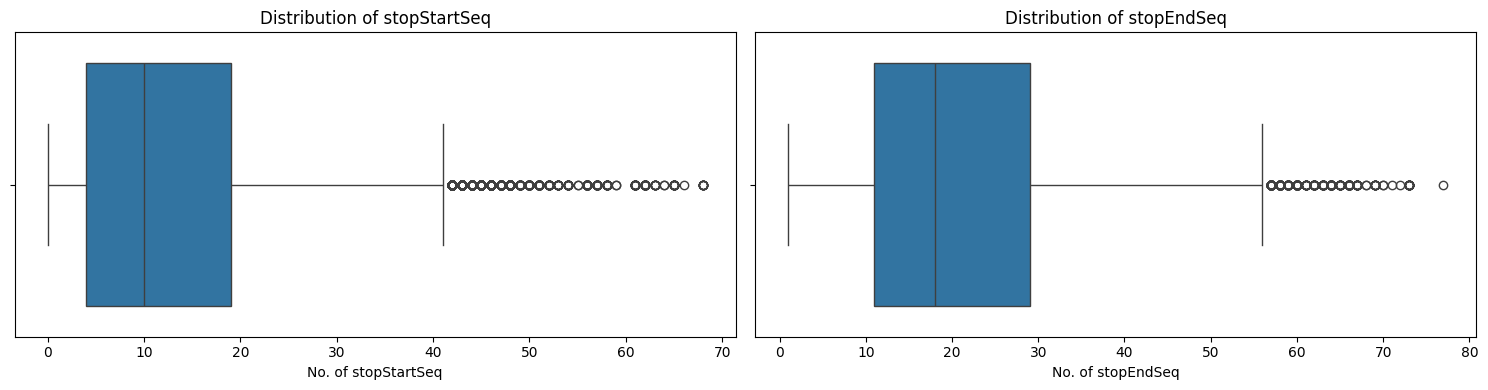

In [333]:
plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(df[col],orient='h')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'No. of {col}')

plt.tight_layout()
plt.show()

We can see that stop sequence has a range up to 50 stops for one trip. A few of them has more than 70 stops.

* Distribution of Payment Method

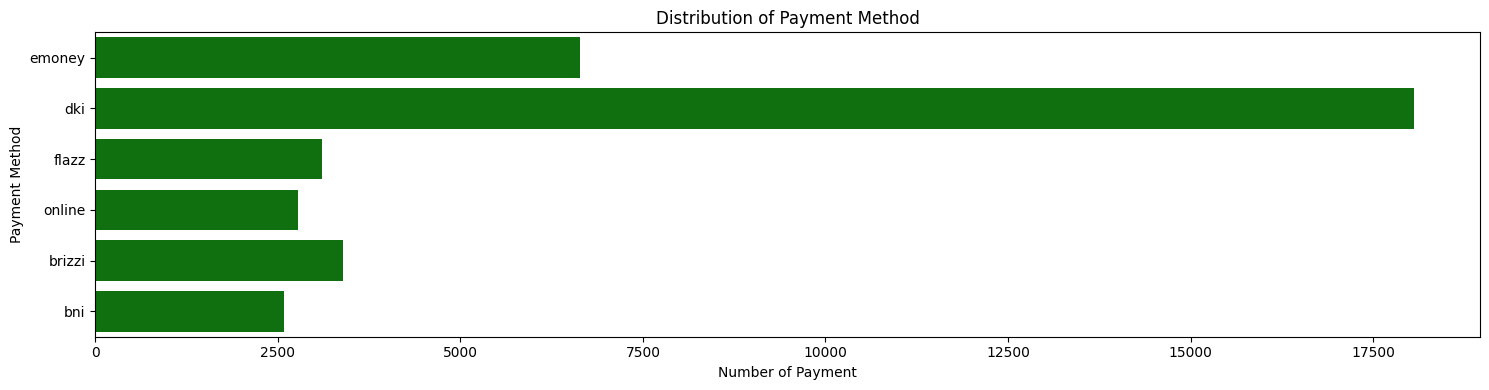

In [334]:
plt.figure(figsize=(15, num_rows * 4))

sns.countplot(dft['payCardBank'], color='green')
plt.title(f'Distribution of Payment Method')
plt.xlabel(f'Number of Payment')
plt.ylabel('Payment Method')

plt.tight_layout()
plt.show()

We can see that Transjakarta Passengers mostly use Bank DKI for their payments.

* Distribution of Passenger's Gender

In [335]:
gender = dft['payCardSex'].value_counts()
gender = gender.reset_index()
gender.columns = ['gender', 'count']
gender['gender'] = ['Female','Male']
gender

,gender,count
0,Female,19470
1,Male,17090


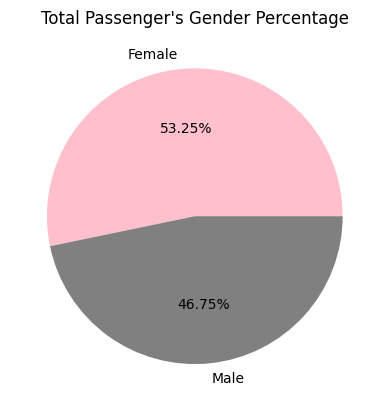

In [336]:
plt.pie(gender.loc[:,'count'],
        labels=gender.loc[:,'gender'],
        autopct='%2.2f%%',
        colors=['pink', 'grey'])
plt.title("Total Passenger's Gender Percentage")
plt.show()

As we can see from the above, Female Passenger is more than Male passengers by 53%.

### Normality test on Numerical Variables

In this section, we will test some numerical variables to determine if they are normally distributed by using measures of central tendency, statistical tests, and visualization techniques.

#### Age

In this part, we will be visualizing passenger's age distribution in Transjakarta's service. We will group passenger's age into four categories:

    - Teenager : Age 12-19
    - Adult : Age 20-44
    - Pre-Elderly : Age 45-59
    - Elderly : Age 60 and above

In [337]:
bins = [12, 20, 45, 60, 100]  
labels = ['Teenager', 'Adult', 'Pre-Elderly', 'Elderly'] 

age_group = pd.cut(dft['payCardAge'], bins=bins, labels=labels, right=False)

age_group_df = pd.DataFrame(age_group.value_counts())
age_group_df

,count
payCardAge,
Adult,23856
Pre-Elderly,5976
Teenager,5927
Elderly,801


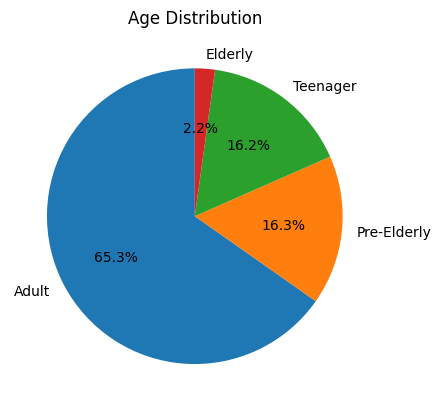

In [338]:
plt.pie(age_group_df['count'], labels=age_group_df.index, autopct='%1.1f%%',startangle=90)
plt.title('Age Distribution')
plt.show()

As we can see above, adults comprise the largest age category among passengers, followed by pre-elderly, teenagers, and the elderly.

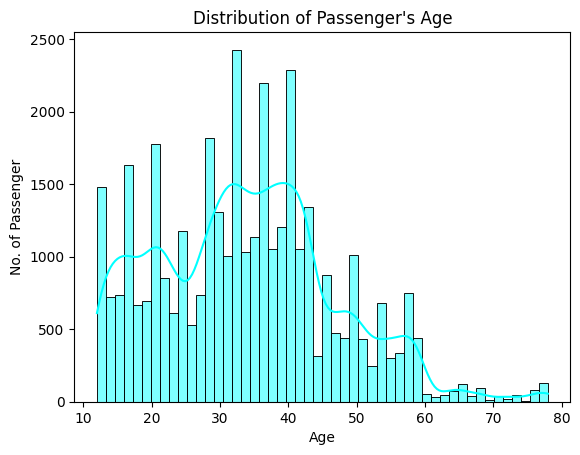

In [339]:
sns.histplot(dft['payCardAge'], color='cyan',bins=50, kde=True)
plt.title("Distribution of Passenger's Age")
plt.xlabel('Age')
plt.ylabel('No. of Passenger')
plt.show()

We can see that the age distribution is left-skewed with the peak is somewhere around 30-40 years old. We can fit that into previous pie plot and assume that most of Transjakarta passengers is Adult.

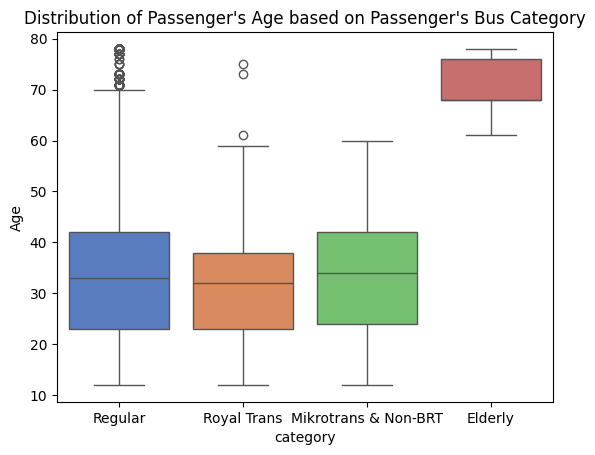

In [340]:
sns.boxplot(x='category', y='payCardAge', data=dft, hue='category', palette='muted',legend=False)
plt.title("Distribution of Passenger's Age based on Passenger's Bus Category")
plt.ylabel('Age')
plt.show()

We can see that Regular category has the widest variance of passenger's age while Elderly category has the narrowest variance. It's because Elderly is grouped by their age.

From that, we can have a normality test for deciding whether Age data is normally distributed or not.

* Age Normality Test

In [341]:
age_mean = dft['payCardAge'].mean()
print(f"Average Passenger's Age : {age_mean:.2f} ")

age_median = dft['payCardAge'].median()
print(f"Median Passenger's Age : {age_median} ")

Average Passenger's Age : 33.87 
Median Passenger's Age : 34.0 


We can see that the mean and the median is not too far. Since it could be the sign of a normally distributed data, we need to test it using another statistical test. We're using D'Agostino and Pearson Test since it has big samples of data and the method is specifically made to test data normality.

In [342]:
dagostino_test = stats.normaltest(dft['payCardAge'])
print("D’Agostino and Pearson’s Test:", dagostino_test)
if dagostino_test[1] > 0.05:
    print('Not enough evidence to reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

D’Agostino and Pearson’s Test: NormaltestResult(statistic=np.float64(971.5970845981583), pvalue=np.float64(1.0480301165630928e-211))
Reject Null Hypothesis


From the result, we can conclude that Age data is not normally distributed. We can visualize it qith Q-Q plot to view the data's pattern.

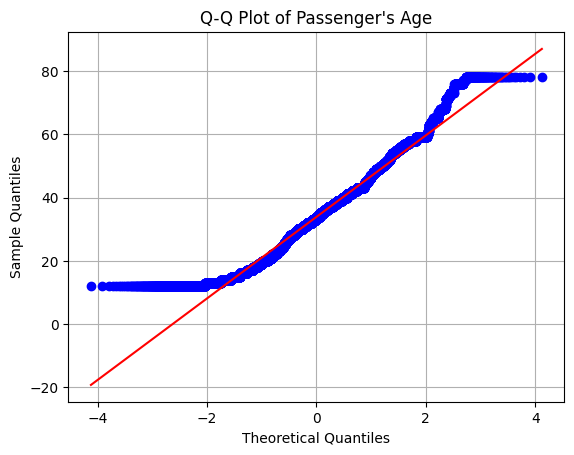

In [343]:
stats.probplot(dft['payCardAge'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Passenger's Age")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

#### Travel Time

In this part, we will be looking for some details and visualizing passenger's travel time distribution while using Transjakarta's service

In [344]:
display(dft['tapInTime'].min() ,dft['tapInTime'].max())

Timestamp('2023-04-01 06:22:27')

Timestamp('2023-04-30 21:55:41')

We can see that the first passenger starts to use Transjakarta service at 6 AM, while the last passenger is at 9 PM

In [345]:
display(dft['tapOutTime'].min() ,dft['tapOutTime'].max())

Timestamp('2023-04-01 07:27:31')

Timestamp('2023-04-30 23:23:18')

We can see that the first passenger finished to use Transjakarta service at 7 AM, while the last passenger is at 11 PM

We can also visualize passenger's travel time distribution while using Transjakarta's service

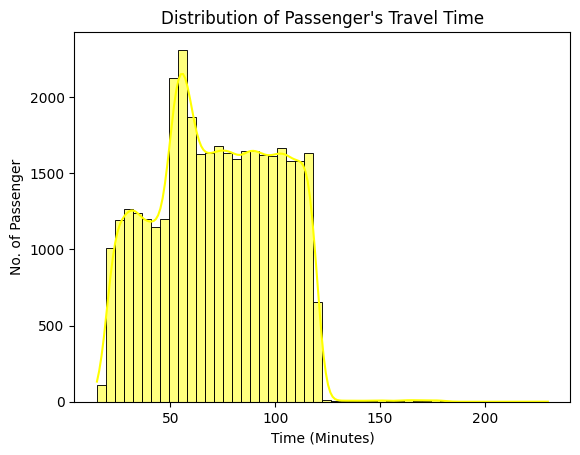

In [346]:
ttplot = dft['travelTime'].dt.total_seconds()/60

sns.histplot(ttplot, color='yellow',kde=True,bins=50)
plt.title("Distribution of Passenger's Travel Time")
plt.xlabel('Time (Minutes)')
plt.ylabel('No. of Passenger')
plt.show()

We can see that the distribution is left-skewed with the peak is somewhere around 50-100 minutes. We can assume that most of the service is not so quick to travel along its corridor.

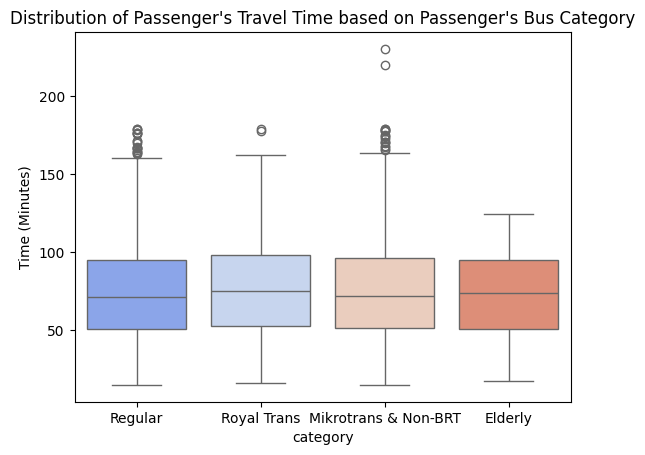

In [347]:
sns.boxplot(x=dft['category'], y=ttplot, hue=dft['category'], palette='coolwarm',legend=False)
plt.title("Distribution of Passenger's Travel Time based on Passenger's Bus Category")
plt.ylabel('Time (Minutes)')
plt.show()

We can see that Regular, Royal Trans, and Mikrotrans category has the widest variance of passenger's travel time while Elderly category has the narrowest variance. There are some outlier on Miktrotrans travel time since their route sometimes passes through small streets which might be prone to traffic jam.

From that, we can have a normality test for deciding whether Travel Time data is normally distributed or not.

* Travel Time Normality test

In [348]:
tt_min = dft['travelTime'].dt.total_seconds()/60

tt_mean = tt_min.mean()
print(f"Average Passenger's Travel Time : {tt_mean:.2f} Minute")

tt_median = tt_min.median()
print(f"Median Passenger's Travel Time : {tt_median:.2f} Minute")


Average Passenger's Travel Time : 72.14 Minute
Median Passenger's Travel Time : 71.84 Minute


We can see that the mean and the median is not too far. Since it could be the sign of a normally distributed data, we need to test it using another statistical test. We're using D'Agostino and Pearson Test since it has big samples of data and the method is specifically made to test data normality.

In [349]:
dagostino_test = stats.normaltest(tt_min)
print("D’Agostino and Pearson’s Test:", dagostino_test)
if dagostino_test[1] > 0.05:
    print('Not enough evidence to reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

D’Agostino and Pearson’s Test: NormaltestResult(statistic=np.float64(4355.76452568503), pvalue=np.float64(0.0))
Reject Null Hypothesis


From the result, we can conclude that Travel Time data is not normally distributed. We can visualize it qith Q-Q plot to view the data's pattern.

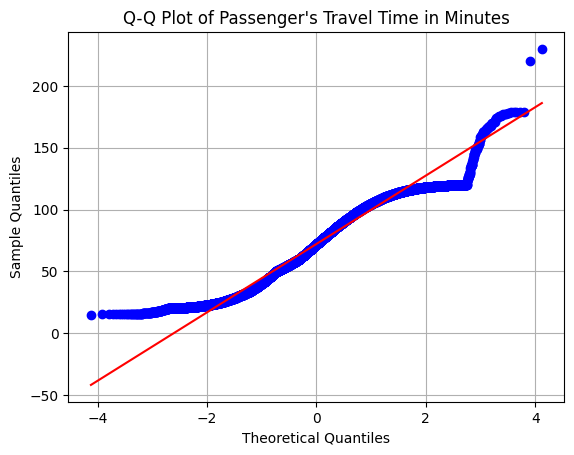

In [350]:
stats.probplot(tt_min, dist="norm", plot=plt)
plt.title("Q-Q Plot of Passenger's Travel Time in Minutes")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

#### Estimation of Average Time Spent per Stops

We will be visualizing passenger's Estimation of Average Time Spent per Stops distribution while using Transjakarta's service. Estimation of Average Time Spent per Stops is estimation of time needed for passenger to move through a bus stop.

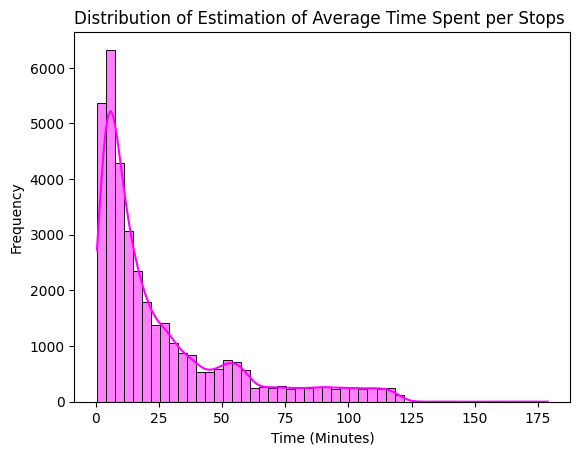

In [351]:
sns.histplot(dft['avgSeqTime'], color='magenta',kde=True,bins=50)
plt.title("Distribution of Estimation of Average Time Spent per Stops ")
plt.xlabel('Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

We can see that the distribution is left-skewed with the peak is somewhere around 0-25 minutes. We can assume that most of the service have a short headway time.

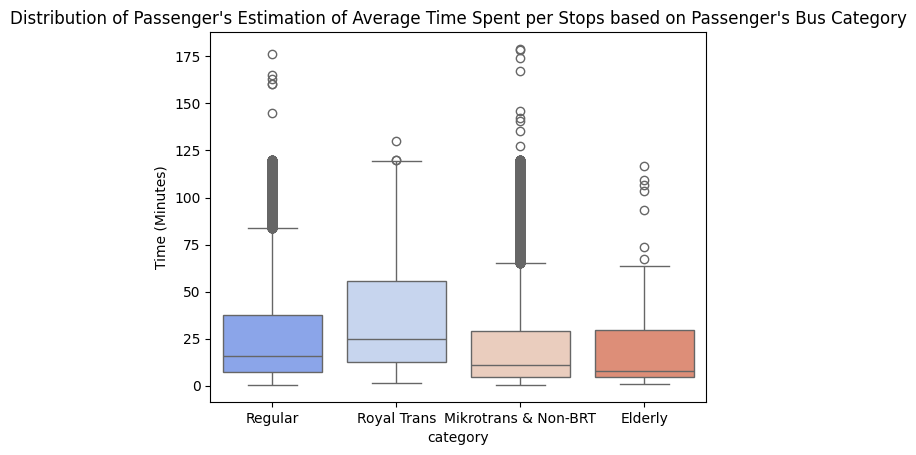

In [352]:
sns.boxplot(x=dft['category'], y=dft['avgSeqTime'], hue=dft['category'], palette='coolwarm',legend=False)
plt.title("Distribution of Passenger's Estimation of Average Time Spent per Stops based on Passenger's Bus Category")
plt.ylabel('Time (Minutes)')
plt.show()

We can see Royal Trans has the widest variance of passenger's travel time while Elderly category has the narrowest variance. Mikrotans has the most outlier that can be an indication of some corridor could have lots of stops and obstacles in its way.

From that, we can have a normality test for deciding whether Estimation of Average Time Spent per Stops data is normally distributed or not.

* Estimation of Average Time Spent per Stops Normality test

In [353]:
avgSeqTime_mean = dft['avgSeqTime'].mean()
print(f"Average Estimation of Average Time Spent per Stops : {avgSeqTime_mean:.2f} Minute")

avgSeqTime_median = dft['avgSeqTime'].median()
print(f"Median Estimation of Average Time Spent per Stops : {avgSeqTime_median:.2f} Minute")

Average Estimation of Average Time Spent per Stops : 25.46 Minute
Median Estimation of Average Time Spent per Stops : 13.78 Minute


We can see that the mean and the median is a little bit far. Since it could be the sign of a not normally distributed data, we need to test it using another statistical test. We're using D'Agostino and Pearson Test since it has big samples of data and the method is specifically made to test data normality.

In [354]:
dagostino_test = stats.normaltest(dft['avgSeqTime'])
print("D’Agostino and Pearson’s Test:", dagostino_test)
if dagostino_test[1] > 0.05:
    print('Not enough evidence to reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

D’Agostino and Pearson’s Test: NormaltestResult(statistic=np.float64(10283.717044741408), pvalue=np.float64(0.0))
Reject Null Hypothesis


From the result, we can conclude that Estimation of Average Time Spent per Stops data is not normally distributed. We can visualize it qith Q-Q plot to view the data's pattern.

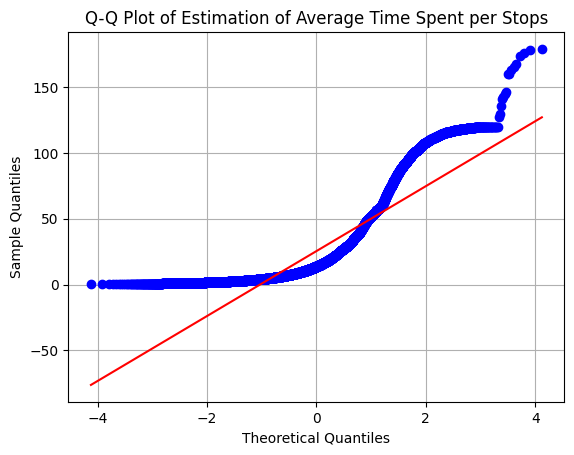

In [355]:
stats.probplot(dft['avgSeqTime'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Estimation of Average Time Spent per Stops")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

### Correlation

In this part, we can see correlation of several numerical variables of the data

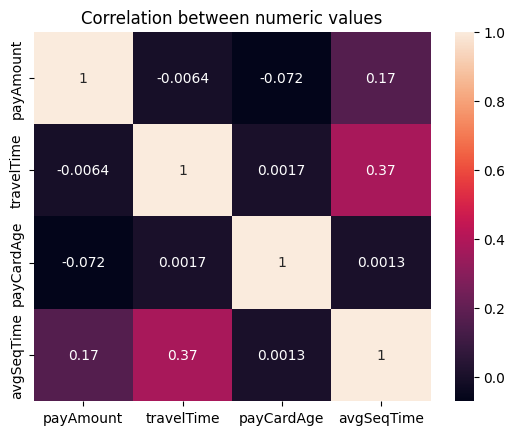

In [356]:
corrs = dft[['payAmount','travelTime','payCardAge','avgSeqTime']].corr(method='spearman')
sns.heatmap(corrs,annot=True,)
plt.title('Correlation between numeric values')
plt.show()

From the heatmap above, we can conclude that most of those variables are weakly correlated to each other. The strongest one is between `travelTime` and `avgSeqTime` with 0.37 points which indicates a weakly positive correlation. The weakest one is between `payCardAge` and `avgSeqTime` with 0.0013 points.

### Aggregrations

In this part, we're trying to apply several agggregration to gain insight about passenger's characteristics.

#### Total Passengers

We will count the total passenger based on the bus category.

In [357]:
passengers = dft['payCardID'].nunique()
passengers_regular = dft[dft['category'] == 'Regular']['payCardID'].nunique()
passengers_royal = dft[dft['category'] == 'Royal Trans']['payCardID'].nunique()
passengers_elder = dft[dft['category'] == 'Elderly']['payCardID'].nunique()
passengers_special = dft[dft['category'] == 'Mikrotrans & Non-BRT']['payCardID'].nunique()

pas_sum = {
    'Category':['Total Passenger','Regular BRT','Royal Trans BRT','Mikrotrans & Non-BRT','Elderly Passenger'],
    'No. of Passenger':[passengers,passengers_regular,passengers_royal,passengers_special,passengers_elder]
}

passengers_df = pd.DataFrame(pas_sum).sort_values(by='No. of Passenger',ascending=False)
passengers_df

,Category,No. of Passenger
0,Total Passenger,1988
3,Mikrotrans & Non-BRT,1542
1,Regular BRT,1249
2,Royal Trans BRT,169
4,Elderly Passenger,38


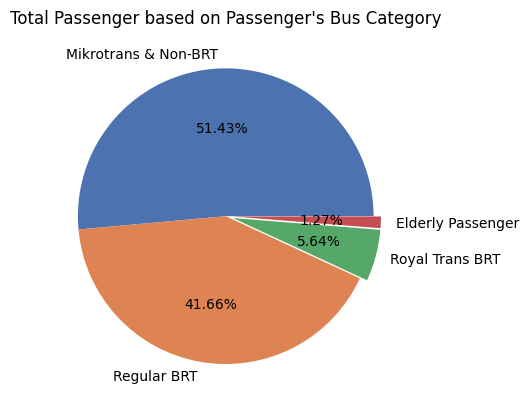

In [358]:
passengers_plot = passengers_df[passengers_df['Category'] != 'Total Passenger']
plt.pie(passengers_plot['No. of Passenger'],
        explode=[0,0,0.05,0.05],
        labels=passengers_plot['Category'],
        autopct='%2.2f%%',
        colors=sns.color_palette('deep'))
plt.title("Total Passenger based on Passenger's Bus Category")
plt.show()

Based on the above plot, we can see that Mikrotrans & Non BRT has the most passenger among all categories.

#### Total Revenue

We will count the total revenue based on the bus category. Notice that we're excluding the categories that has `payAmount` of 0.

In [359]:
revenue = dft[~dft['category'].isin(['Mikrotrans & Non-BRT', 'Elderly'])][['payAmount', 'category']]

revenue_sum = revenue['payAmount'].sum()
revenue_regular = revenue[revenue['category'] == 'Regular']['payAmount'].sum()
revenue_royal = revenue[revenue['category'] == 'Royal Trans']['payAmount'].sum()

sum = {
    'Category':['Total Revenue','Regular BRT','Royal Trans BRT'],
    'Revenue (Rp)':[revenue_sum,revenue_regular,revenue_royal]
}

revenue_df = pd.DataFrame(sum)
revenue_df

,Category,Revenue (Rp)
0,Total Revenue,93827000.0
1,Regular BRT,60907000.0
2,Royal Trans BRT,32920000.0


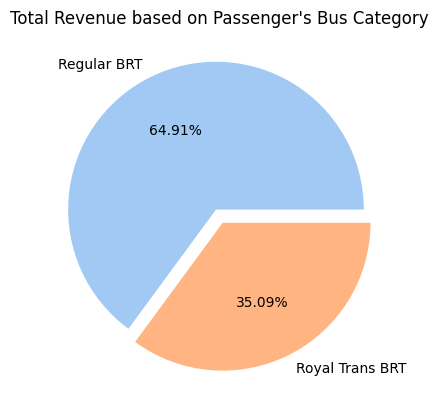

In [360]:
revenue_plot = revenue_df[revenue_df['Category'] != 'Total Revenue']

plt.pie(revenue_plot['Revenue (Rp)'],
        explode=[0.05,0.05],
        labels=revenue_plot['Category'],
        autopct='%2.2f%%',
        colors=sns.color_palette('pastel'))
plt.title("Total Revenue based on Passenger's Bus Category")
plt.show()

Based on the above plot, we can see that Regular BRT has the the largest revenue among all categories. This also correlates with previous plot where Regular BRT has more passengers than Royal Trans BRT despite having more expensive fare. 

#### Total Payment Methods

We will count the total payemnt transaction based on the payment methods.

In [361]:
dft['payCardBank'].unique()

array(['emoney', 'dki', 'flazz', 'online', 'brizzi', 'bni'], dtype=object)

In [362]:
payment = dft['payCardBank'].value_counts().sum()
payment_emoney = dft[dft['payCardBank'] == 'emoney']['payCardBank'].value_counts().values
payment_dki = dft[dft['payCardBank'] == 'dki']['payCardBank'].value_counts().values
payment_flazz = dft[dft['payCardBank'] == 'flazz']['payCardBank'].value_counts().values
payment_online = dft[dft['payCardBank'] == 'online']['payCardBank'].value_counts().values
payment_brizzi = dft[dft['payCardBank'] == 'brizzi']['payCardBank'].value_counts().values
payment_bni = dft[dft['payCardBank'] == 'bni']['payCardBank'].value_counts().values


pay_sum = {
    'Category':['Total','Mandiri e-money','Bank DKI','BCA Flazz','Online','BRI Brizzi','BNI Tapcash'],
    'No. of Payment':[payment,payment_emoney,payment_dki,payment_flazz,payment_online,payment_brizzi,payment_bni]
}

payment_df = pd.DataFrame(pay_sum).sort_values(by='No. of Payment',ascending=False).reset_index(drop=True)
payment_df['No. of Payment'] = pd.to_numeric(payment_df['No. of Payment'], errors='coerce')
payment_df


,Category,No. of Payment
0,Total,36560
1,Bank DKI,18061
2,Mandiri e-money,6639
3,BRI Brizzi,3398
4,BCA Flazz,3106
5,Online,2775
6,BNI Tapcash,2581


In [363]:
payment_state = payment_df.iloc[[1,2,3,6],:]['No. of Payment'].sum()
payment_private = payment_df.iloc[[4,5],:]['No. of Payment'].sum()

pay_sum_2 = {
    'Category':['State-Owned','Private'],
    'No. of Payment':[payment_state,payment_private]
}
payment_state_df = pd.DataFrame(pay_sum_2).sort_values(by='No. of Payment',ascending=False).reset_index(drop=True)
payment_state_df

,Category,No. of Payment
0,State-Owned,30679
1,Private,5881


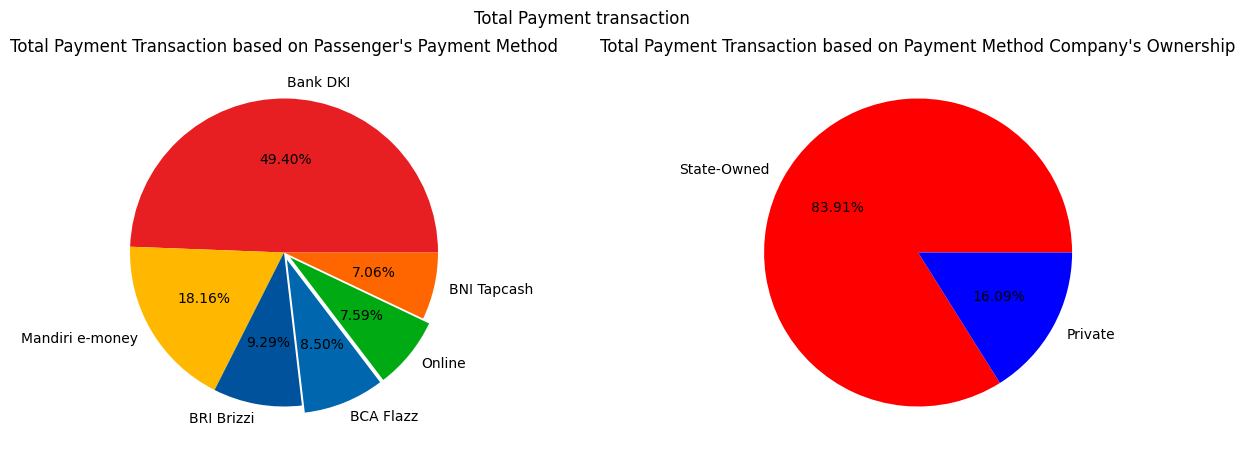

In [364]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))
plt.suptitle('Total Payment transaction')

payment_plot = payment_df.drop(index=[0])
axs[0].pie(payment_plot.iloc[:,1],
        explode=[0,0,0,0.05,0.05,0],
        labels=payment_plot['Category'],
        autopct='%2.2f%%',
        colors=['#E71E22','#ffb700','#00529c','#0066ae','#00aa13','#ff6600'])
axs[0].set_title("Total Payment Transaction based on Passenger's Payment Method")


axs[1].pie(
    payment_state_df['No. of Payment'], 
    autopct='%2.2f%%', 
    colors=['red', 'blue'], 
    labels=payment_state_df['Category'])
axs[1].set_title("Total Payment Transaction based on Payment Method Company's Ownership")

plt.show()

Based on the above plot, we can see that Bank DKI is the most used payment method by Transjakarta's passenger. We can also see that most of the payment method used is provided by a state-owned company. 

In [365]:
revenue_total = dft['payAmount'].sum()
revenue_emoney = dft[dft['payCardBank'] == 'emoney']['payAmount'].sum()
revenue_dki = dft[dft['payCardBank'] == 'dki']['payAmount'].sum()
revenue_flazz = dft[dft['payCardBank'] == 'flazz']['payAmount'].sum()
revenue_online = dft[dft['payCardBank'] == 'online']['payAmount'].sum()
revenue_brizzi = dft[dft['payCardBank'] == 'brizzi']['payAmount'].sum()
revenue_bni = dft[dft['payCardBank'] == 'bni']['payAmount'].sum()

rev_sum = {
    'Category':['Total','Mandiri e-money','Bank DKI','BCA Flazz','Online','BRI Brizzi','BNI Tapcash'],
    'Revenue':[revenue_total,revenue_emoney,revenue_dki,revenue_flazz,revenue_online,revenue_brizzi,revenue_bni]
}

revenue_df = pd.DataFrame(rev_sum).sort_values(by='Revenue', ascending=False)
revenue_df

,Category,Revenue
0,Total,93827000.0
2,Bank DKI,42317000.0
1,Mandiri e-money,19215000.0
5,BRI Brizzi,11225000.0
3,BCA Flazz,8256500.0
4,Online,6483500.0
6,BNI Tapcash,6330000.0


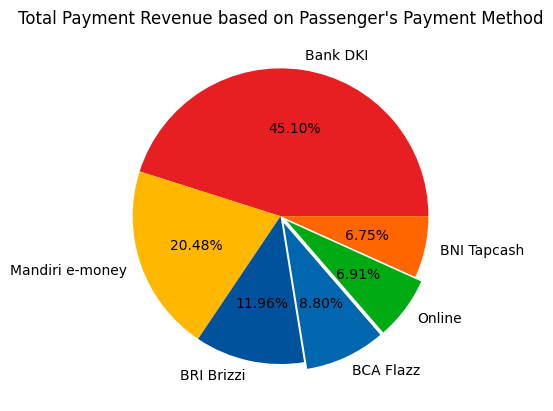

In [366]:
revenue_plot = revenue_df.drop(index=[0])
plt.pie(revenue_plot.iloc[:,1],
        explode=[0,0,0,0.05,0.05,0],
        labels=revenue_plot['Category'],
        autopct='%2.2f%%',
        colors=['#E71E22','#ffb700','#00529c','#0066ae','#00aa13','#ff6600'])
plt.title("Total Payment Revenue based on Passenger's Payment Method")
plt.show()

Based on the above plot, we can see that Bank DKI has the higest revenue contribution towards Transjakarta. It also supported by the huge number of passenger that used it's payment method. 

In [367]:
payrev_df = pd.merge(payment_df, revenue_df, on='Category', how='outer')
payrev_df

,Category,No. of Payment,Revenue
0,BCA Flazz,3106,8256500.0
1,BNI Tapcash,2581,6330000.0
2,BRI Brizzi,3398,11225000.0
3,Bank DKI,18061,42317000.0
4,Mandiri e-money,6639,19215000.0
5,Online,2775,6483500.0
6,Total,36560,93827000.0


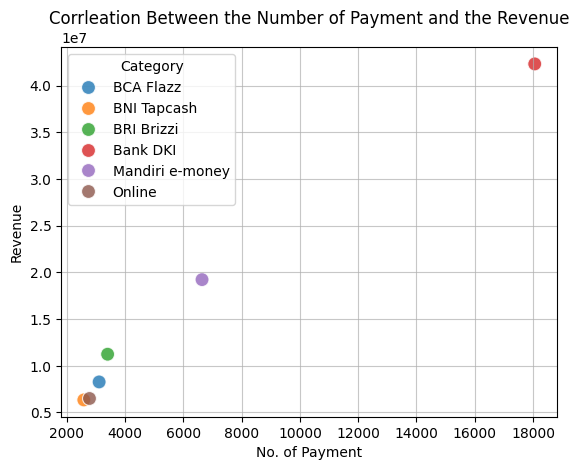

In [368]:
payrev_plot = payrev_df[:-1]
sns.scatterplot(data=payrev_plot, x='No. of Payment', y='Revenue', hue='Category', s=100, edgecolor='w',alpha=0.8)
plt.title('Corrleation Between the Number of Payment and the Revenue')
plt.grid(visible=True, linestyle='-', alpha=0.7)
plt.show()

Based on the above plot, we can see a correlation between the number of payments made and the revenue. It can be inferred that the more frequently a payment method is used, the larger its contribution to the total revenue.

#### Average Travel Time (go and back)

In this part, we'll be looking for some insights from travel time throughout Transjakarta services.

 For each corridor, there are two directions, go and back. Go means the bus will travel from the initial stop towards endpoint stop, meanwhile Back means the bus will travel from the endpoint stop back to its initial stop. 
 
 We can take an example from Corridor 1, which is from Blok M to Kota. For direction Go, the bus will travel from Blok M Terminal through all the designated stops until the bus reach Kota terminal. Then, the bus will travel by direction Back through all the designated stops until it reached its initial stops, Blok M Terminal. 
 
 We need to consider that some corridor might not have the same number of stop for both direction so it might be resulting different measurment of time between both directions.

In [369]:
avg_go = dft[dft['direction'] == 0]['travelTime'].mean()
avg_back = dft[dft['direction'] == 1]['travelTime'].mean()
display(avg_go,avg_back)

Timedelta('0 days 01:10:58.312701977')

Timedelta('0 days 01:13:18.142654209')

As we can see, the average time for both direction are slightly different. Go direction has faster average time than Back direction. This could happen because of the difference of number of stops for each direction in a corridor.

In [370]:
avg_go_regular = dft[(dft['direction'] == 0) & (dft['category'] == 'Regular')]['travelTime'].mean()
avg_go_royal = dft[(dft['direction'] == 0) & (dft['category'] == 'Royal Trans')]['travelTime'].mean()
avg_go_mikro_elder = dft[(dft['direction'] == 0) & (dft['category'] == 'Mikrotrans & Non-BRT')]['travelTime'].mean()

go_cat = {
    'Category':['Regular BRT','Royal Trans BRT','Mikrotrans'],
    'Average Time':[avg_go_regular,avg_go_royal,avg_go_mikro_elder]
}

go_avg_time_df = pd.DataFrame(go_cat).sort_values(by='Average Time',ascending=False)
go_avg_time_df

,Category,Average Time
1,Royal Trans BRT,0 days 01:15:23.998774509
2,Mikrotrans,0 days 01:11:06.830457440
0,Regular BRT,0 days 01:10:24.746806306


The average time of Royal Trans BRT for Go direction is the longest among all. This because many of their corridor have their inital stop start from outer Jakarta e.g. Bekasi or Cibubur. Hence, it resulted in longer travel time. 

In [371]:
avg_back_regular = dft[(dft['direction'] == 1) & (dft['category'] == 'Regular')]['travelTime'].mean()
avg_back_royal = dft[(dft['direction'] == 1) & (dft['category'] == 'Royal Trans')]['travelTime'].mean()
avg_back_mikro_elder = dft[(dft['direction'] == 1) & (dft['category'] == 'Mikrotrans & Non-BRT')]['travelTime'].mean()

back_cat = {
    'Category':['Regular BRT','Royal Trans BRT','Mikrotrans'],
    'Average Time':[avg_back_regular,avg_back_royal,avg_back_mikro_elder]
}

back_avg_time_df = pd.DataFrame(back_cat).sort_values(by='Average Time',ascending=False)
back_avg_time_df

,Category,Average Time
2,Mikrotrans,0 days 01:13:47.172389871
1,Royal Trans BRT,0 days 01:12:58.574698795
0,Regular BRT,0 days 01:12:50.967519798


In here, the overall average time for Back direction is slightly longer than Go direction. We can see that Regular BRT and Royal Trans BRT has almost the same average time despite longer travel time in Go direction. Surprisingly, Mikrotrans has the longest average time travel for Back direction.

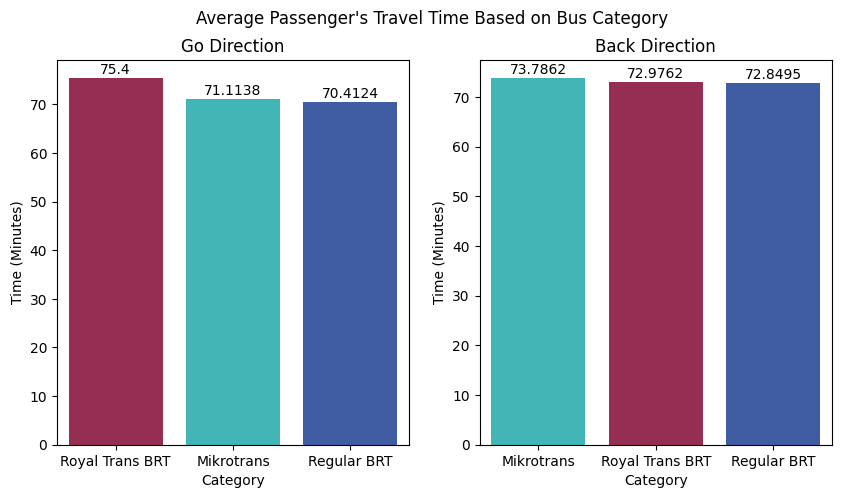

In [372]:
go_avg_tominutes = go_avg_time_df['Average Time'].dt.total_seconds() / 60
back_avg_tominutes = back_avg_time_df['Average Time'].dt.total_seconds() / 60
bus_color_go = ['#A71D50','#2EC8CA','#2F56B3']
bus_color_back = ['#2EC8CA','#A71D50','#2F56B3']

fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle("Average Passenger's Travel Time Based on Bus Category")

bar0 = sns.barplot(x=go_avg_time_df['Category'], 
            y=go_avg_tominutes, 
            hue=go_avg_time_df['Category'], 
            palette=bus_color_go,
            legend=False ,
            ax=axs[0])

for container in bar0.containers:
    bar0.bar_label(container, label_type='edge', padding=1)

axs[0].set_xlabel('Category')
axs[0].set_ylabel('Time (Minutes)')
axs[0].set_title("Go Direction")

bar1 = sns.barplot(x=back_avg_time_df['Category'], 
            y=back_avg_tominutes, 
            hue=back_avg_time_df['Category'], 
            palette=bus_color_back,
            legend=False ,
            ax=axs[1])

for container in bar1.containers:
    bar1.bar_label(container, label_type='edge', padding=1)

axs[1].set_xlabel('Category')
axs[1].set_ylabel('Time (Minutes)')
axs[1].set_title("Back Direction")

plt.show()

From the plot above, we can conclude that Royal Trans BRT has the longest average time travel, while Regular BRT is the shortest.

#### Day and Hour of Service

In this part, we will analyze number of passenger for every day and hour. The dataset date range is from April 1st to April 30th 2023. To create an analysis, we need to slice the data into several parts:
 - Time Interval : range of time between tap out time and tap in time, also known as travel time of a passenger from initial stop towards final stop in one direction of a corridor.
 - Days Range : range of days in the dataset. This range will be divided into two parts, days of tap ins and tap outs
 - Hour Range : range of hours in the dataset. This range will be divided into two parts, hours of tap ins and tap outs

In [373]:
time = dft[['tapInTime','tapOutTime','direction']].copy()
time.loc[:,'interval'] = time.loc[:,'tapOutTime']-time.loc[:,'tapInTime']
time.loc[:,'InDays'] = time['tapInTime'].dt.date
time.loc[:,'OutDays'] = time['tapOutTime'].dt.date
time.loc[:,'InHour'] = time['tapInTime'].dt.hour
time.loc[:,'OutHour'] = time['tapOutTime'].dt.hour
time

,tapInTime,tapOutTime,direction,interval,InDays,OutDays,InHour,OutHour
0,2023-04-03 05:21:44,2023-04-03 06:00:53,1.0,0 days 00:39:09,2023-04-03,2023-04-03,5,6
1,2023-04-03 05:42:44,2023-04-03 06:40:01,0.0,0 days 00:57:17,2023-04-03,2023-04-03,5,6
2,2023-04-03 05:59:06,2023-04-03 06:50:55,0.0,0 days 00:51:49,2023-04-03,2023-04-03,5,6
3,2023-04-03 05:44:51,2023-04-03 06:28:16,0.0,0 days 00:43:25,2023-04-03,2023-04-03,5,6
4,2023-04-03 06:17:35,2023-04-03 06:57:03,0.0,0 days 00:39:28,2023-04-03,2023-04-03,6,6
...,...,...,...,...,...,...,...,...
36555,2023-04-21 18:18:37,2023-04-21 19:55:49,1.0,0 days 01:37:12,2023-04-21,2023-04-21,18,19
36556,2023-04-18 21:52:31,2023-04-18 22:28:22,1.0,0 days 00:35:51,2023-04-18,2023-04-18,21,22
36557,2023-04-04 10:29:47,2023-04-04 13:27:25,1.0,0 days 02:57:38,2023-04-04,2023-04-04,10,13
36558,2023-04-15 19:59:26,2023-04-15 20:27:50,1.0,0 days 00:28:24,2023-04-15,2023-04-15,19,20


#### Total Movement

After slicing the dataset we can analyze the number of movement between two directions

C:\Users\Erlangga\AppData\Local\Temp\ipykernel_41012\2870720637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  move = sns.barplot(x=movement_counts.index, y=movement_counts.values, palette='pastel')


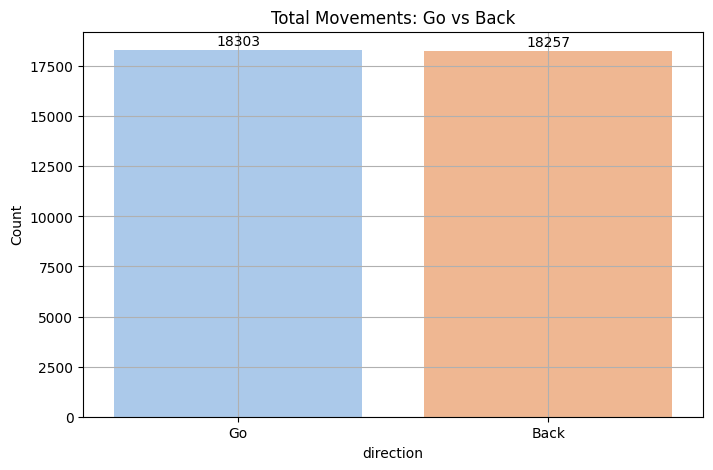

In [374]:
movement_counts = time['direction'].value_counts().rename({0: 'Go', 1: 'Back'})
plt.figure(figsize=(8, 5))
move = sns.barplot(x=movement_counts.index, y=movement_counts.values, palette='pastel')
for container in move.containers:
    move.bar_label(container, label_type='edge', padding=1)
plt.title('Total Movements: Go vs Back')
plt.xticks(ticks=[0, 1], labels=['Go', 'Back'])
plt.ylabel('Count')
plt.grid()
plt.show()

From plot above, we can see that there are more passengers that travel in Go direction rather than Back direction. The number difference might happened because there might be some passengers that only travel to a certain direction once.

#### TapIn Daily Movement and Hourly Movement

In this part, we will analyze daily and hourly movement of passenger based on their tap ins on both direction

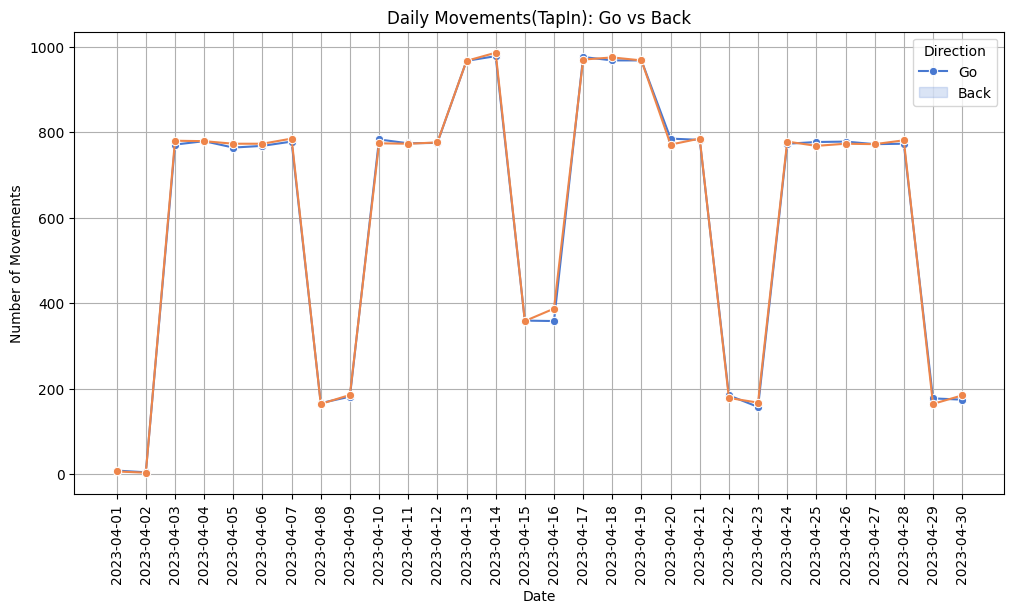

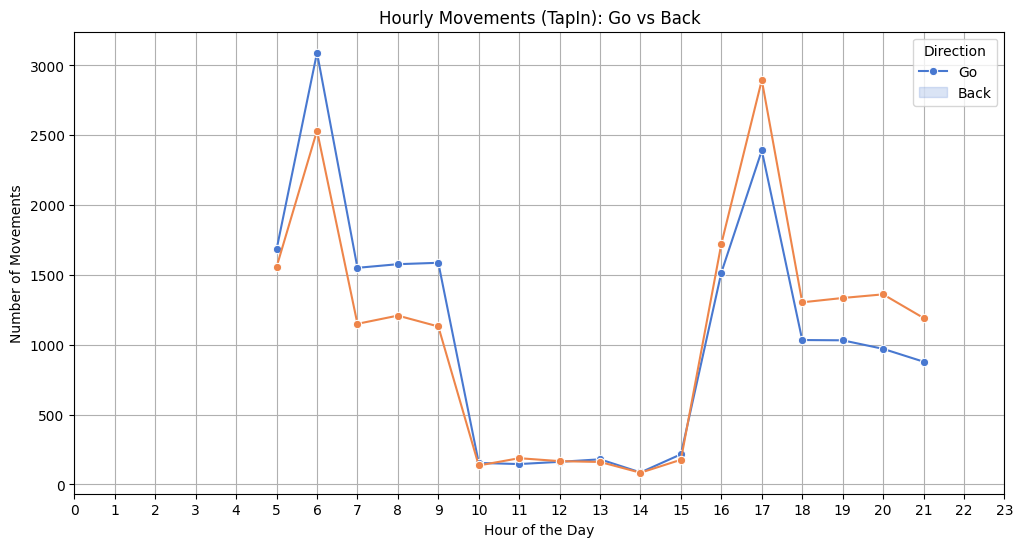

In [375]:
daily_entries_in = time.groupby('InDays').size().reset_index(name='Counts')
daily_movement_in = time.groupby(['InDays', 'direction']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_movement_in, x='InDays', y='Counts', hue='direction', marker='o', palette='muted')
plt.title('Daily Movements(TapIn): Go vs Back')
plt.xlabel('Date')
plt.ylabel('Number of Movements')
plt.xticks(daily_entries_in['InDays'], rotation=90)
plt.grid()
plt.legend(title='Direction', labels=['Go', 'Back'])
plt.show()

hourly_movement_in = time.groupby(['InHour', 'direction']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_movement_in, x='InHour', y='Counts', hue='direction', marker='o', palette='muted')
plt.title('Hourly Movements (TapIn): Go vs Back')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Movements')
plt.xticks(range(0, 24))
plt.grid()
plt.legend(title='Direction', labels=['Go', 'Back'])
plt.show()

From the Daily Movement (Tap In) Plot, we can observe certain patterns. The number of passengers remains relatively consistent throughout the weekdays, but drops over the weekend. The highest number of passengers was recorded on April 14th in both directions. The number of passengers started low at the beginning of the month, peaked in the middle, and then declined again towards the end of the month. There is no significant difference of the number of passenger based on both directions.

From the Hourly Movement (Tap In) Plot, we can also observe certain patterns. The number of passengers starts high in the morning, drops in the middle of the day, and peaks again in the afternoon before declining once more towards the end of the day. In the morning, the number of passengers traveling in the 'Go' direction is higher than in the 'Back' direction, while in the afternoon, the number of passengers in the 'Back' direction surpasses that in the 'Go' direction. The number of passengers in the 'Go' direction peaks at 6 AM and drops at 2 PM, whereas in the 'Back' direction, the number of passengers peaks at 5 PM and drops at 2 PM.

#### TapOut Daily Movement and Hourly Movement

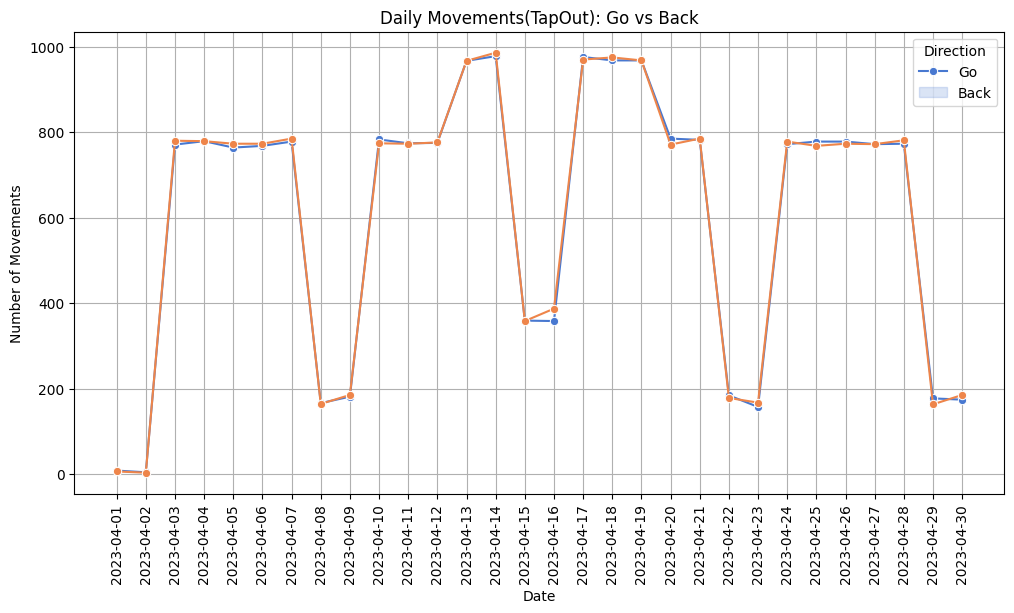

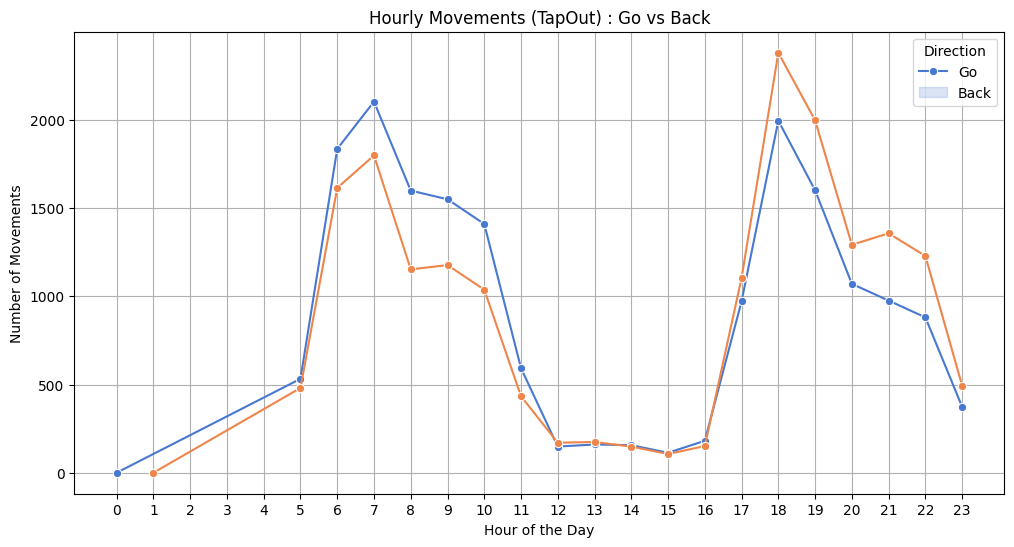

In [376]:
daily_entries_out = time.groupby('OutDays').size().reset_index(name='Counts')
daily_movement_out = time.groupby(['OutDays', 'direction']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_movement_out, x='OutDays', y='Counts', hue='direction', marker='o', palette='muted')
plt.title('Daily Movements(TapOut): Go vs Back')
plt.xlabel('Date')
plt.ylabel('Number of Movements')
plt.xticks(daily_entries_out['OutDays'],rotation=90)
plt.grid()
plt.legend(title='Direction', labels=['Go', 'Back'])
plt.show()

hourly_movement_out = time.groupby(['OutHour', 'direction']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_movement_out, x='OutHour', y='Counts', hue='direction', marker='o', palette='muted')
plt.title('Hourly Movements (TapOut) : Go vs Back')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Movements')
plt.xticks(range(0, 24))
plt.grid()
plt.legend(title='Direction', labels=['Go', 'Back'])
plt.show()

From the Daily Movement (Tap Out) Plot, we can observe similar patterns with the Daily Movement (Tap In) plot. The number of passengers remains relatively consistent throughout the weekdays, but drops over the weekend. The highest number of passengers was recorded on April 14th in both directions. The number of passengers started low at the beginning of the month, peaked in the middle, and then declined again towards the end of the month. There is no significant difference of the number of passenger based on both directions.

From the Hourly Movement (Tap Out) Plot, we can also observe similar patterns with the Hourly Movement (Tap Out) plot. The number of passengers starts from the bottom in the midnight, and then skyrocketing high in the morning, drops in the middle of the day, and peaks again in the afternoon before declining once more towards the end of the day. In the morning, the number of passengers traveling in the 'Go' direction is higher than in the 'Back' direction, while in the afternoon, the number of passengers in the 'Back' direction surpasses that in the 'Go' direction. The number of passengers in the 'Go' direction peaks at 7 AM and drops at 12 AM, whereas in the 'Back' direction, the number of passengers peaks at 6 PM and drops at 12 AM.

## Top 10 Corridor And Revenue

In this section, we will analyze the top 10 corridors with the highest passenger numbers and largest revenue. This analysis aims to provide insights into how a small portion of the service can significantly contribute to the overall system.

### Top 10 Corridor with the Most Passennger

In this part, we will be analyzing Top 10 corridor with the most passenger and its breakdown toward several variables.

#### Number of Passengers

In [377]:
top10 = dft[['payCardID','payCardBank','corridorID','corridorName','payCardSex','payAmount','category','payCardAge','travelTime']]

top10_corridor = top10['corridorID'].value_counts().nlargest(10)

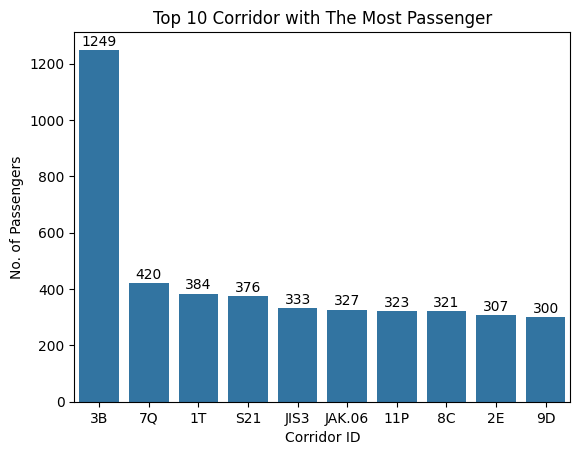

In [378]:
plot1 = sns.barplot(x=top10_corridor.index, 
            y=top10_corridor.values, 
            legend=False)

for container in plot1.containers:
    plot1.bar_label(container, label_type='edge', padding=1)
    
plt.xlabel('Corridor ID')
plt.ylabel('No. of Passengers')
plt.title("Top 10 Corridor with The Most Passenger")
plt.show()

As we can see from the above, Corridor 3B has the highest number of passengers, with a significantly larger count compared to the other corridors. 3B is a Non-BRT corridor which means it doesn't generate revenue despite its high number of passenger.

#### Gender Distribution

In this section, we will break down gender composition and distribution towards the top 10 busiest corridor.

In [379]:
top10_index = top10['corridorID'].value_counts().nlargest(10).index # get index of top 10 corridor id
top10_corridor_new = top10[top10['corridorID'].isin(top10_index)] # filter dataframe 

top10_gender_corridor = top10_corridor_new.groupby(['corridorID', 'payCardSex']).size().unstack(fill_value=0)  # counts of gender for each corridor id
top10_gender_corridor['count'] = top10_gender_corridor.loc[:,'F'] + top10_gender_corridor.loc[:,'M'] # sum all gender across category
top10_gender_corridor = top10_gender_corridor.sort_values(by='count',ascending=False).head(10) # sort descending
top10_gender_corridor

payCardSex,F,M,count
corridorID,,,
3B,679,570,1249
7Q,287,133,420
1T,158,226,384
S21,124,252,376
JIS3,125,208,333
JAK.06,173,154,327
11P,159,164,323
8C,167,154,321
2E,209,98,307


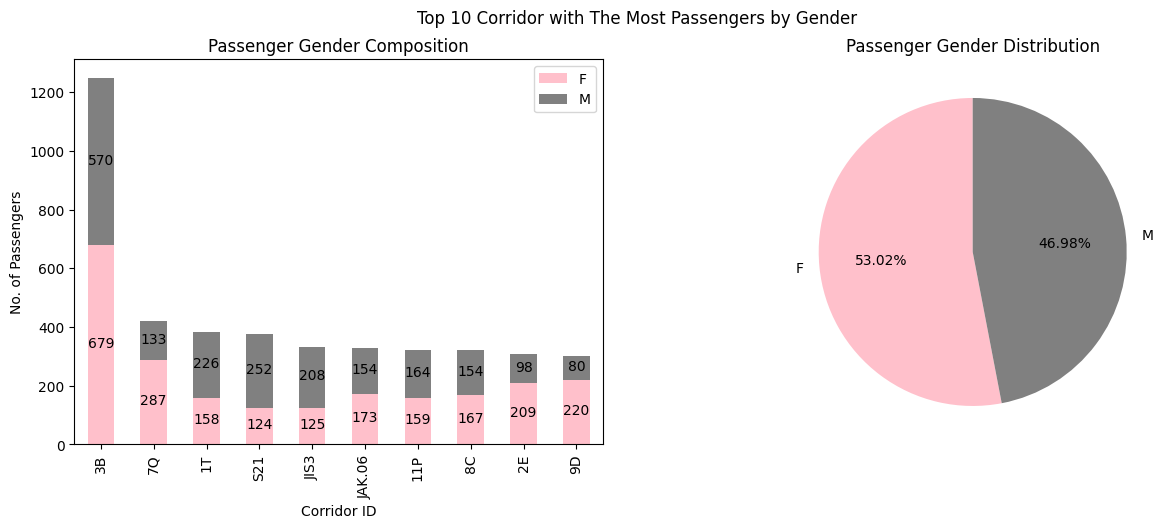

In [380]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))
plt.suptitle('Top 10 Corridor with The Most Passengers by Gender')

plot2_data = top10_gender_corridor.drop(columns='count')
plot2 = plot2_data.plot(
    kind='bar', 
    stacked=True, 
    color=['pink', 'grey'], 
    ax=axs[0])

for container in plot2.containers:
    plot2.bar_label(container, label_type='center', padding=1)

axs[0].set_xlabel('Corridor ID')
axs[0].set_ylabel('No. of Passengers')
axs[0].set_title("Passenger Gender Composition")
axs[0].legend()

top10_gender = top10_corridor_new['payCardSex'].value_counts() # counts of gender

plot2a = top10_gender
axs[1].pie(
    plot2a, 
    autopct='%2.2f%%', 
    startangle=90, 
    colors=['pink', 'grey'], 
    labels=top10_gender.index)
axs[1].set_title("Passenger Gender Distribution")

plt.show()

As we can see from the above analysis, the gender composition of the top 10 corridors with the highest passenger numbers is dominated by females. Only four corridors—1T, S21, JIS3, and 11P—are dominated by males. The pie chart indicates that females constitute the majority of passengers among the top 10 busiest corridors.

#### Bus Category Distribution

In this section we will break down top 10 busiest corridor based on the bus category.

In [381]:
plot3 = top10.pivot_table(values='payCardID',index='corridorID',columns=['category','payCardAge'],aggfunc='count').fillna(0)

In [382]:
plot3_normal = plot3['Regular'].sum(axis=1).sort_values(ascending=False).head(10)
plot3_royal = plot3['Royal Trans'].sum(axis=1).sort_values(ascending=False).head(10)
plot3_special = plot3['Mikrotrans & Non-BRT'].sum(axis=1).sort_values(ascending=False).head(10)

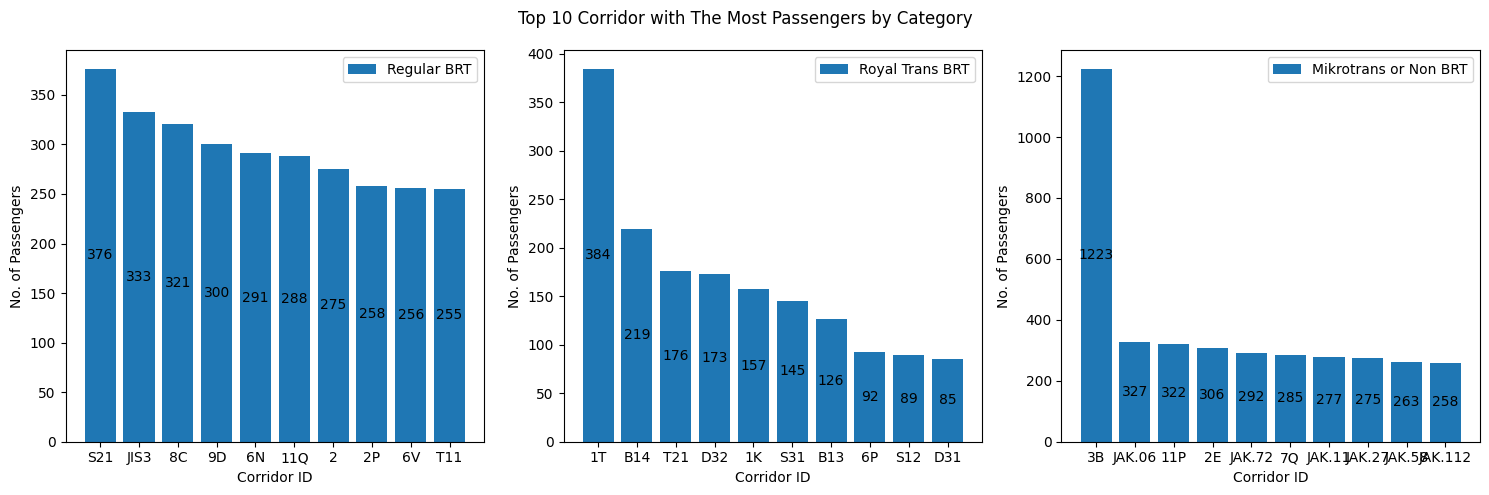

In [383]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
plt.suptitle('Top 10 Corridor with The Most Passengers by Category')

axs[0].bar(plot3_normal.index, plot3_normal.values, label='Regular BRT')
axs[1].bar(plot3_royal.index, plot3_royal.values, label='Royal Trans BRT')
axs[2].bar(plot3_special.index, plot3_special.values, label='Mikrotrans or Non BRT')

def ax_labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar width
        height = p.get_height()  # get bar height
        x = p.get_x() + width / 2  # bar's center x coordinate
        y = p.get_y() + height / 2  # bar's center y coordinate

        if height > 0:  # only label positive heights
            ax.annotate(f'{height:.0f}', (x, y), ha='center', va='center')

    ax.set_xlabel('Corridor ID')
    ax.set_ylabel('No. of Passengers')
    ax.legend()

for ax in axs:
    ax_labels(ax)

plt.tight_layout()
plt.show()

As we can see from the above analysis, Corridor 3B remains the busiest among all categories. For Regular BRT, S21 is the busiest corridor, although it has a significantly smaller count compared to others. For Royal Trans, 1T is the busiest corridor, with a number almost equal to that of S21. Additionally, the number of passengers in the Royal Trans plot is significantly lower than that of its busiest corridor, similar to the busiest corridors in the Mikrotrans or Non-BRT category when compared to other corridors within the same category.

#### Age Distribution

In this section we will break down top 10 busiest corridor passenger's age. The age will be grouped into four categories:

    - Teenager : Age 12-19
    - Adult : Age 20-44
    - Pre-Elderly : Age 45-59
    - Elderly : Age 60 and above
    
 source : https://gaya.tempo.co/read/1724197/kategori-umur-balita-remaja-dan-dewasa-menurut-kemenkes-jangan-salah

In [384]:
bins = [12, 20, 45, 60, 100]  
labels = ['Teenager', 'Adult', 'Pre-Elderly', 'Elderly'] 

top10_corridor_new.loc[:, 'age_group'] = pd.cut(top10_corridor_new['payCardAge'], bins=bins, labels=labels, right=False)

top10_revenue = top10_corridor_new['age_group'].value_counts()
top10_revenue

C:\Users\Erlangga\AppData\Local\Temp\ipykernel_41012\1624371920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_corridor_new.loc[:, 'age_group'] = pd.cut(top10_corridor_new['payCardAge'], bins=bins, labels=labels, right=False)


age_group
Adult          2906
Teenager        724
Pre-Elderly     596
Elderly         114
Name: count, dtype: int64

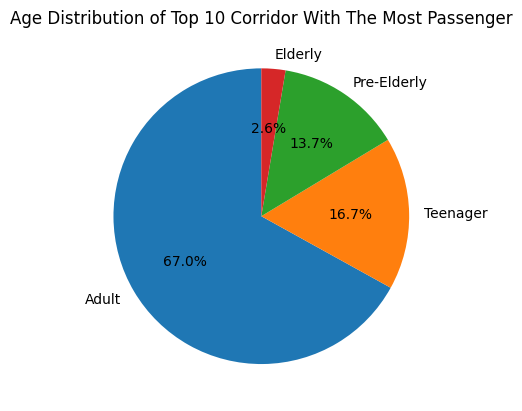

In [385]:
plt.pie(top10_revenue, labels=top10_revenue.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution of Top 10 Corridor With The Most Passenger')
plt.show()

As we can see above Adult category dominates more than half of Transjakarta's passenger within the top 10 busiest corridor, followed by Teenager, Pre-Elderly, and Elderly.

### Top 10 Corridor with the Biggest Revenue

In this part, we will be analyzing Top 10 corridor with the biggest revenue and its breakdown toward several variables.

In [386]:
top10_revenue = top10.pivot_table(values='payAmount',index='corridorID',columns=['category'],aggfunc='sum').fillna(0)
top10_revenue = top10_revenue.drop(columns=['Elderly','Mikrotrans & Non-BRT'])
top10_revenue.loc[:,'count'] = top10_revenue.loc[:,'Regular'] + top10_revenue.loc[:,'Royal Trans']
top10_revenue = top10_revenue.sort_values(by='count',ascending=False).head(10)
top10_revenue

category,Regular,Royal Trans,count
corridorID,,,
1T,0.0,7680000.0,7680000.0
B14,0.0,4380000.0,4380000.0
T21,0.0,3520000.0,3520000.0
D32,0.0,3460000.0,3460000.0
1K,0.0,3140000.0,3140000.0
S31,0.0,2900000.0,2900000.0
B13,0.0,2520000.0,2520000.0
6P,0.0,1840000.0,1840000.0
S12,0.0,1780000.0,1780000.0


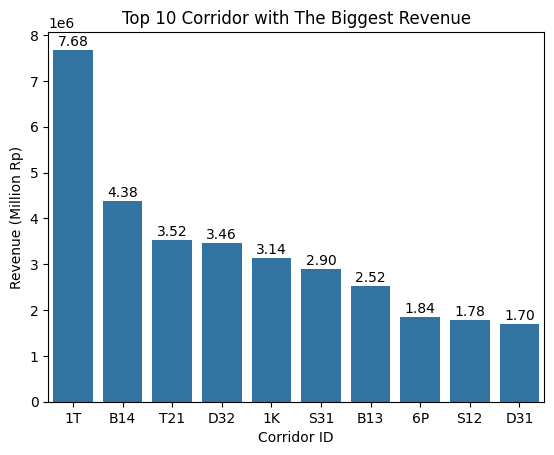

In [387]:
plot4 = sns.barplot(x=top10_revenue.index, 
            y=top10_revenue['count'], 
            legend=False)

def format_labels(value):
    return f'{value / 1_000_000:.2f}'

for container in plot4.containers:
    plot4.bar_label(container, labels=[format_labels(v) for v in container.datavalues], label_type='edge', padding=1)
    
plt.xlabel('Corridor ID')
plt.ylabel('Revenue (Million Rp)')
plt.title("Top 10 Corridor with The Biggest Revenue")
plt.show()

As we can see from the above, Corridor 1T has the highest revenue, with a significantly larger count compared to the other corridors. 3B is a Royal Trans corridor which generate more revenue due to higher fare.

#### Top 10 Corridor with the Biggest Revenue - Payment breakdown - 

In this section, we will break down payment method composition and distribution towards the top 10 corridor with the most revenue.

In [388]:
top10_revenue_payment = top10.pivot_table(values='payAmount',index='corridorID',columns='payCardBank',aggfunc='sum').fillna(0)
top10_revenue_payment.loc[:,'sum'] = top10_revenue_payment.sum(axis=1)
top10_revenue_payment= top10_revenue_payment.sort_values(by='sum',ascending=False).head(10)
top10_revenue_payment

payCardBank,bni,brizzi,dki,emoney,flazz,online,sum
corridorID,,,,,,,
1T,0.0,760000.0,3940000.0,2980000.0,0.0,0.0,7680000.0
B14,1580000.0,760000.0,1920000.0,60000.0,60000.0,0.0,4380000.0
T21,0.0,800000.0,860000.0,20000.0,280000.0,1560000.0,3520000.0
D32,20000.0,740000.0,360000.0,1520000.0,80000.0,740000.0,3460000.0
1K,20000.0,800000.0,1660000.0,320000.0,300000.0,40000.0,3140000.0
S31,40000.0,0.0,980000.0,1860000.0,0.0,20000.0,2900000.0
B13,20000.0,800000.0,860000.0,820000.0,0.0,20000.0,2520000.0
6P,60000.0,20000.0,980000.0,20000.0,740000.0,20000.0,1840000.0
S12,40000.0,60000.0,840000.0,80000.0,740000.0,20000.0,1780000.0


In [389]:
top10_revenue_payment.loc['sum',:] = top10_revenue_payment.sum(axis=0)
rev_pay_sum = top10_revenue_payment.loc['sum',:].T
rev_pay_sum = rev_pay_sum.drop(index='sum')
rev_pay_sum

payCardBank
bni        1780000.0
brizzi     5520000.0
dki       13260000.0
emoney     7700000.0
flazz      2240000.0
online     2420000.0
Name: sum, dtype: float64

In [390]:
top10_revenue_payment.loc[:,'sum'] = top10_revenue_payment.sum(axis=1)
top10_revenue_payment = top10_revenue_payment.sort_values(by='sum',ascending=False).head(10)
top10_revenue_payment

payCardBank,bni,brizzi,dki,emoney,flazz,online,sum
corridorID,,,,,,,
sum,1780000.0,5520000.0,13260000.0,7700000.0,2240000.0,2420000.0,65840000.0
1T,0.0,760000.0,3940000.0,2980000.0,0.0,0.0,15360000.0
B14,1580000.0,760000.0,1920000.0,60000.0,60000.0,0.0,8760000.0
T21,0.0,800000.0,860000.0,20000.0,280000.0,1560000.0,7040000.0
D32,20000.0,740000.0,360000.0,1520000.0,80000.0,740000.0,6920000.0
1K,20000.0,800000.0,1660000.0,320000.0,300000.0,40000.0,6280000.0
S31,40000.0,0.0,980000.0,1860000.0,0.0,20000.0,5800000.0
B13,20000.0,800000.0,860000.0,820000.0,0.0,20000.0,5040000.0
6P,60000.0,20000.0,980000.0,20000.0,740000.0,20000.0,3680000.0


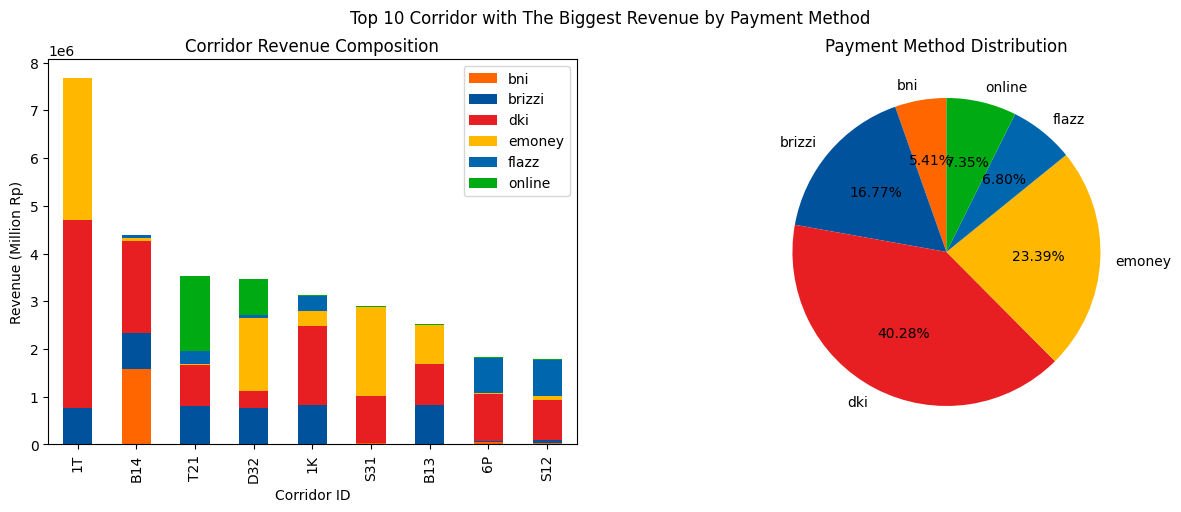

In [391]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))
plt.suptitle('Top 10 Corridor with The Biggest Revenue by Payment Method')

plot5_data = top10_revenue_payment.drop(columns='sum',index=top10_revenue_payment.index[0])
plot5 = plot5_data.plot(
    kind='bar', 
    stacked=True, 
    color=['#ff6600','#00529c','#E71E22','#ffb700','#0066ae','#00aa13'], 
    ax=axs[0])

axs[0].set_xlabel('Corridor ID')
axs[0].set_ylabel('Revenue (Million Rp)')
axs[0].set_title("Corridor Revenue Composition")
axs[0].legend()

plot5a = rev_pay_sum
axs[1].pie(
    plot5a, 
    autopct='%2.2f%%', 
    startangle=90,
    labels=rev_pay_sum.index,
    colors=['#ff6600','#00529c','#E71E22','#ffb700','#0066ae','#00aa13'])
axs[1].set_title("Payment Method Distribution")

plt.show()

As we can see from the above analysis, the payment method composition of the top 10 corridors with the highest revenue is dominated by Bank DKI followed by Bank Mandiri emoney thanks to its high usage in the corridor with the highest revenue. The pie chart indicates that Bank DKI constitute the majority of payment method used among the top 10 corridor with the highest revenue.

### Percentage of Top 10 Corridor with The Most Passenger vs Overall Passenger

After observing the top 10 busiest corridors by passenger count and revenue, we can compare them to the overall passenger numbers and revenue to assess their contribution to the Transjakarta system.

In this section we will compare the number of passenger between the top 10 busiest corridor with overall passenger.

In [392]:
x = top10['corridorID'].value_counts().sum()
y = dft['corridorID'].value_counts().nlargest(10).sum()

compare_corridor = {
    'Category':['Top 10 Passenger','Total Passenger'],
    'No. of Passenger':[y,x]
}

compare_corridor_df = pd.DataFrame(compare_corridor)
compare_corridor_df.to_excel('top10_overall_corridor.xlsx') # for tableau

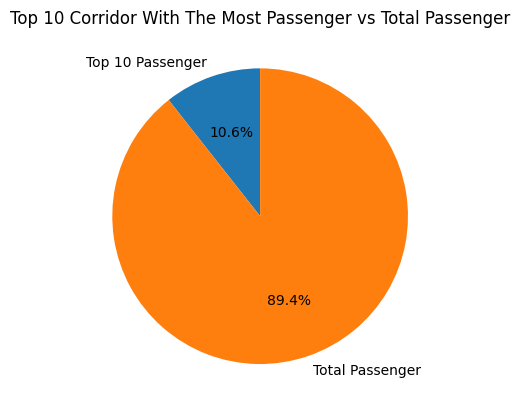

In [393]:
plt.pie(compare_corridor_df.loc[:,'No. of Passenger'], labels=compare_corridor_df.loc[:,'Category'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Corridor With The Most Passenger vs Total Passenger')
plt.show()

As we can see from the above, the Top 10 passenger holds 10.6% of the total passengers. This indicates that the passenger's distribution is evenly distributed for every routes. This distribution highlights the diverse usage of the system.

### Percentage of Top 10 Corridor with The Biggest Revenue vs Overall Revenue

In this section we will compare the revenue between the top 10 highest revenue corridor with overall revenue.

In [394]:
x = top10_revenue['count'].sum()
y = dft['payAmount'].sum()

compare_revenue = {
    'Category':['Top 10 Revenue','Total Revenue'],
    'Revenue':[x,y]
}

compare_revenue_df = pd.DataFrame(compare_revenue)
compare_revenue_df.to_excel('top10_overall_revenue.xlsx')

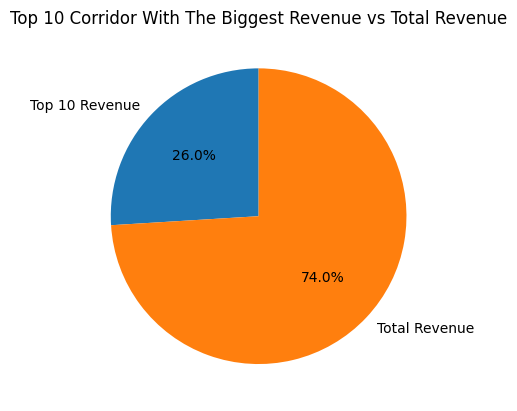

In [395]:
plt.pie(compare_revenue_df.loc[:,'Revenue'], labels=compare_revenue_df.loc[:,'Category'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Corridor With The Biggest Revenue vs Total Revenue')
plt.show()

As we can see from the data above, the top 10 revenue-generating corridors account for only 26% of the total revenue. This indicates that revenue distribution is relatively even across all routes. Such a distribution highlights the diverse usage of the Transjakarta system, suggesting that many corridors contribute to the overall financial performance rather than relying on a few high-traffic routes.

## Conclusion

After analyzsing the dataset, we can draw some conclusion by answering the questions asked in the Problem section:
1. What are the characteristics of Transjakarta passengers, such as gender, age, and travel time?
<br><br>
From the dataset, we know that Transjakarta passengers consist of 53.25% female and 46.75% male. All passengers are aged between 10 and 70 years, with the largest age group being adults (20-44 years old), which accounts for more than half of them at 63%.
<br><br>
On average, Transjakarta passengers travel for 72.14 minutes. Depending on the bus category, the average travel time may vary. Meanwhile, passengers spend an average of 25.46 minutes traveling from one stop to another. Passengers typically board the bus between 5 AM and 9 PM. In April 2023, the number of passengers started at a low point at the beginning of the month, reached a peak in the middle, and then declined toward the end of the month.
<br><br>
To enter and exit the bus, Transjakarta passengers do not need to buy a ticket. Instead, they can use various payment methods, such as electronic cards or online digital payments. According to the dataset, Transjakarta passengers primarily used the Bank DKI card as their payment method of choice.
<br> <br>
2. Which Transjakarta corridor is the busiest and most profitable? How's the contribution of those corridors toward Transjakarta's traffic and revenue?
<br><br>
The busiest Transjakarta corridor is 3B Rusun Flamboyan - Cengkareng, a non-BRT bus, transporting 1,249 passengers in April 2023. Meanwhile, the most profitable corridor is 1T Cibubur - Balai Kota, a RoyalTrans bus, generating revenue of up to Rp7,680,000 in April 2023.
<br><br>
In the previous analysis, we compiled a list of the top 10 busiest and most profitable corridors in Transjakarta to provide insight into the effectiveness of the system. The top 10 busiest corridors account for 10.6% of the total passenger count, indicating that passengers are spread relatively evenly across the remaining Transjakarta corridors. Similarly, the top 10 most profitable corridors contribute 26% of the total revenue, suggesting a balanced distribution of passengers and highlighting the diverse usage of the Transjakarta system.

## Recommendations

Based on previous conclusion, we can give some recommendation for creating a better service and system for Transjakarta.
1. Targeted marketing and promotion for Teenager and Elderly
<br><br>
Since portion of passengers is concentrated in Adult, marketing campaign could be launched to gain more passengers from different age group. Especially for the Elderly age group, the socialization of TJ Card need to be spread more to promote public services to them.
<br><br>
2. Service improvement for less busy corridors
<br><br>
A deeper analysis need to be made for less busy corridors, such as amenities, stops condition, and number of buses. This needed to create a room for improvement and to create a decision whether a corridor is effective enough or not.
<br><br>
3. Diversify payment option
<br><br>
Digitalized system is really vulnerable towards attack or malfunction, thus we need to promote more payment method provider and offer it to passenger to diversify payment methods so there's always an alternative that available in case of emergency. 